# Business Purpose:
This Project uses Bank Marketing Campaign dataset to predict which customers are likely to open term deposit account in response to tellemarketing calls.

# Import libraries we need

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Import CSV file for Banking dataset called 'banking target'

In [ ]:
#Reading the file by uploading into Colab
from google.colab import files
uploaded = files.upload()
data=pd.read_csv('banking target.csv')

Saving banking target.csv to banking target.csv


In [ ]:
#Reading the file from Google Drive
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
#data = pd.read_csv('/content/drive/MyDrive/Bank_Marketing_Campaign/banking_target.csv')

Read Data

In [ ]:
data.head(5)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
data.shape

(45211, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
 #   Column     Non-Null Count  Dtype
#---  ------     --------------  -----
# 0   age        45211 non-null  int64    Age
# 1   job        45211 non-null  object   Job
# 2   marital    45211 non-null  object   Marital Status
# 3   education  45211 non-null  object   Level of Education
# 4   default    45211 non-null  object   Default Payment: Failed to make a payment
# 5   balance    45211 non-null  int64    Avg Balance
# 6   housing    45211 non-null  object   Own vs Rent
# 7   loan       45211 non-null  object   Do they have a loan with bank or not
# 8   contact    45211 non-null  object   Contact Method
# 9   day        45211 non-null  int64    Last Date of contact with client (day)
# 10  month      45211 non-null  object   Last Date of contact with client (Month)
# 11  duration   45211 non-null  int64    Duration of call in seconds
# 12  campaign   45211 non-null  int64    Number of contacts performed during this campaign and for this client (includes last contact)
# 13  pdays      45211 non-null  int64    Number of days since client was last contacted from a previous campaign (-1 means client was not previously contacted)
# 14  previous   45211 non-null  int64    Number of contacts performed before this campaign and for this client
# 15  poutcome   45211 non-null  object   Result of previous campaign
# 16  y          45211 non-null  object   Client opened a Time Deposit Account in this campaign

In [ ]:
#Find Someone with previous Deposit Account: y==yes
data[data['y']=='yes']

age         job   marital  education default  balance housing loan  \
83      59      admin.   married  secondary      no     2343     yes   no   
86      56      admin.   married  secondary      no       45      no   no   
87      41  technician   married  secondary      no     1270     yes   no   
129     55    services   married  secondary      no     2476     yes   no   
168     54      admin.   married   tertiary      no      184      no   no   
...    ...         ...       ...        ...     ...      ...     ...  ...   
45204   73     retired   married  secondary      no     2850      no   no   
45205   25  technician    single  secondary      no      505      no  yes   
45206   51  technician   married   tertiary      no      825      no   no   
45207   71     retired  divorced    primary      no     1729      no   no   
45208   72     retired   married  secondary      no     5715      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome    y  
83      unknown    5   may      1042         1     -1         0  unknown  yes  
86      unknown    5   may      1467         1     -1         0  unknown  yes  
87      unknown    5   may      1389         1     -1         0  unknown  yes  
129     unknown    5   may       579         1     -1         0  unknown  yes  
168     unknown    5   may       673         2     -1         0  unknown  yes  
...         ...  ...   ...       ...       ...    ...       ...      ...  ...  
45204  cellular   17   nov       300         1     40         8  failure  yes  
45205  cellular   17   nov       386         2     -1         0  unknown  yes  
45206  cellular   17   nov       977         3     -1         0  unknown  yes  
45207  cellular   17   nov       456         2     -1         0  unknown  yes  
45208  cellular   17   nov      1127         5    184         3  success  yes  

[5289 rows x 17 columns]

Check Data for missing/null values or duplicates

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
#Get % of missing values
(data.isnull().sum()/len(data.index))*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

# Define New Categorical Features

In [ ]:
# Group pdays into x number of days interval
#lets assume we would like to group them into every 3 months interval or 91 day
#intrv=91

In [ ]:
# Get min and max of pdays
min_pdays = data['pdays'].min()
max_pdays = data['pdays'].max()
print(min_pdays)
print(max_pdays)

-1
871


In [ ]:
#define a function called pdays_grouping
def pdays_grouping(x, intrv):
  if x==-1:
    return "No Previous Contacts"
  elif x<=intrv*1:
    return f"0-{intrv*1} Days"
  elif x<=intrv*2:
    return f"{intrv*1}-{intrv*2} Days"
  elif x<=intrv*3:
    return f"{intrv*2}-{intrv*3} Days"
  elif x<=intrv*4:
    return f"{intrv*3}-{intrv*4} Days"
  elif x<=intrv*5:
    return f"{intrv*4}-{intrv*5} Days"
  elif x<=intrv*6:
    return f"{intrv*5}-{intrv*6} Days"
  else: return f"over {intrv*6} Days"


In [ ]:
#apply the function to pdays and save results into new column called pdays_group
data['pdays_group']=data['pdays'].apply(lambda x: pdays_grouping(x, 91))

In [ ]:
print(data['pdays_group'].value_counts())

pdays_group
No Previous Contacts    36954
91-182 Days              2638
273-364 Days             2190
182-273 Days             1891
0-91 Days                 844
364-455 Days              528
455-546 Days               91
over 546 Days              75
Name: count, dtype: int64


In [ ]:
data['pdays_group'].value_counts(normalize=True)*100

pdays_group
No Previous Contacts    81.736745
91-182 Days              5.834863
273-364 Days             4.843954
182-273 Days             4.182610
0-91 Days                1.866802
364-455 Days             1.167857
455-546 Days             0.201278
over 546 Days            0.165889
Name: proportion, dtype: float64

In [ ]:
#define a new column called 'first_campaign', if pdays==-1 meaning the customer hasn't been contacted in previous campaign then first_campaign='y' else 'n'
data['first_campaign']= data['pdays'].apply(lambda x: 'y' if x == -1 else 'n')
data.first_campaign.value_counts()

first_campaign
y    36954
n     8257
Name: count, dtype: int64

Explore Data:

In [ ]:
data.education.value_counts()


education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [ ]:
data.education.value_counts(normalize=True)*100


education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

In [ ]:
data.marital.value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [ ]:
data.marital.value_counts(normalize=True)*100

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

In [ ]:
data.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [ ]:
data.housing.value_counts(normalize=True)*100

housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64

In [ ]:
data.first_campaign.value_counts(normalize=True)*100

first_campaign
y    81.736745
n    18.263255
Name: proportion, dtype: float64

In [ ]:
#Let's explore numerical features. Note: 'describe' by default only runs on numeric values

In [ ]:
data.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

In [ ]:
#If you would like to include variables with 'Object' type use describe(include='object')
#T is for Transpose

In [ ]:
data.describe(include='object').T

count unique                   top   freq
job             45211     12           blue-collar   9732
marital         45211      3               married  27214
education       45211      4             secondary  23202
default         45211      2                    no  44396
housing         45211      2                   yes  25130
loan            45211      2                    no  37967
contact         45211      3              cellular  29285
month           45211     12                   may  13766
poutcome        45211      4               unknown  36959
y               45211      2                    no  39922
pdays_group     45211      8  No Previous Contacts  36954
first_campaign  45211      2                     y  36954

# Renaming some columns

In [ ]:
#rename y to target
data = data.rename(columns={'y': 'target'})

In [ ]:
#rename Campaign to contact_count
data=data.rename(columns={'campaign':'contact_count'})

In [ ]:
#rename previous to p_contact_count
data=data.rename(columns={'previous':'p_contact_count'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   default          45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contact          45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  contact_count    45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  p_contact_count  45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  target           45211 non-null  object
 17  pdays_group      45211 non-null

In [ ]:
#Change target 'yes' to deposit and 'no' to 'no-deposit'
data['target']=data['target'].replace({'yes':'deposit','no':'no-deposit'})

In [ ]:
data.target.value_counts()

target
no-deposit    39922
deposit        5289
Name: count, dtype: int64

In [ ]:
data.target.value_counts(normalize=True)*100

target
no-deposit    88.30152
deposit       11.69848
Name: proportion, dtype: float64

In [ ]:
#export the file so you can also use other tools for visualization
data.to_csv('banking_data_renamed.csv',index=False)

In [ ]:
#Create 2 data frames that has statistic values 1 for deposit, 2 for no-deposit
Deposit=data[data['target']=='deposit'].describe().T
Deposit

count         mean          std     min    25%    50%  \
age              5289.0    41.670070    13.497781    18.0   31.0   38.0   
balance          5289.0  1804.267915  3501.104777 -3058.0  210.0  733.0   
day              5289.0    15.158253     8.501875     1.0    8.0   15.0   
duration         5289.0   537.294574   392.525262     8.0  244.0  426.0   
contact_count    5289.0     2.141047     1.921826     1.0    1.0    2.0   
pdays            5289.0    68.702968   118.822266    -1.0   -1.0   -1.0   
p_contact_count  5289.0     1.170354     2.553272     0.0    0.0    0.0   

                    75%      max  
age                50.0     95.0  
balance          2159.0  81204.0  
day                22.0     31.0  
duration          725.0   3881.0  
contact_count       3.0     32.0  
pdays              98.0    854.0  
p_contact_count     1.0     58.0

In [ ]:
no_Deposit=data[data['target']=='no-deposit'].describe().T
no_Deposit

count         mean          std     min   25%    50%  \
age              39922.0    40.838986    10.172662    18.0  33.0   39.0   
balance          39922.0  1303.714969  2974.195473 -8019.0  58.0  417.0   
day              39922.0    15.892290     8.294728     1.0   8.0   16.0   
duration         39922.0   221.182806   207.383237     0.0  95.0  164.0   
contact_count    39922.0     2.846350     3.212767     1.0   1.0    2.0   
pdays            39922.0    36.421372    96.757135    -1.0  -1.0   -1.0   
p_contact_count  39922.0     0.502154     2.256771     0.0   0.0    0.0   

                    75%       max  
age                48.0      95.0  
balance          1345.0  102127.0  
day                21.0      31.0  
duration          279.0    4918.0  
contact_count       3.0      63.0  
pdays              -1.0     871.0  
p_contact_count     0.0     275.0

In [ ]:
Deposit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, age to p_contact_count
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   7 non-null      float64
 1   mean    7 non-null      float64
 2   std     7 non-null      float64
 3   min     7 non-null      float64
 4   25%     7 non-null      float64
 5   50%     7 non-null      float64
 6   75%     7 non-null      float64
 7   max     7 non-null      float64
dtypes: float64(8)
memory usage: 804.0+ bytes


# **Data Exploring- Visualization**

In [ ]:
colors = ['#acfffc', '#fc2647','#49759c', '#3d7afd','#ffff33','#014182','#b1d1fc','#0d75f8','#c1fd95','#ff724c','#80f9ad','#fffd37','#c79fef']#Note:highest number will be represented by last color in this list

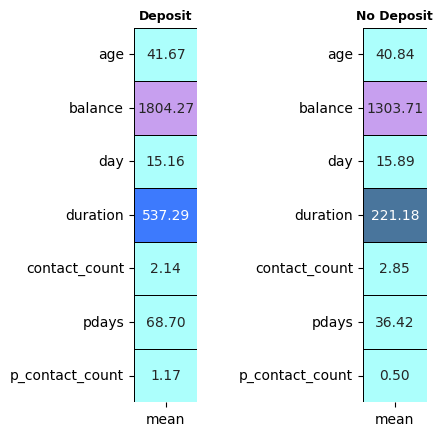

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Deposit', fontsize=9, fontweight='bold')


plt.subplot(1,2,2)
sns.heatmap(no_Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Deposit', fontsize=9, fontweight='bold')

fig.tight_layout(pad = 3)

In [ ]:
# we are comparing all variables means in 2 different result of Deposit and no_Deposit

#duration of call for those who opened a deposit account are much higher 538 vs 222
#those customers who opened a CD normally have a higher avg balance $1800  vs $1300

#Average or Mean of age are very close for both
#Majority are similar except pdays.


In [ ]:
#create an empty list for numerical features
numerical_features = []

In [ ]:
#create an empty list for categorical feauters
categorical_features = []

In [ ]:
#check the type for categorical features
type(categorical_features)

list

In [ ]:
#see all columns in data dataframe
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

In [ ]:
#put object/categorical data in categorical feature and numeric in numeric
#if you run this more than once, it keeps adding to the list
for column in list(data.columns):
  if data[column].dtypes == 'object':
    categorical_features.append(column)
  else:
    numerical_features.append(column)

In [ ]:
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'target', 'pdays_group', 'first_campaign']


In [ ]:
print(numerical_features)

['age', 'balance', 'day', 'duration', 'contact_count', 'pdays', 'p_contact_count']


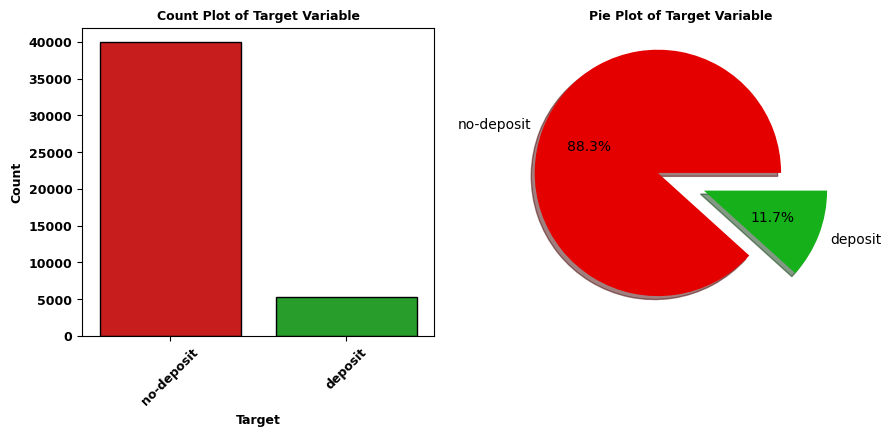

In [ ]:
#Target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
colors_RGY =['#e50000','#15b01a','#ffff14']

plt.subplot(1, 2, 1)
sns.countplot(x='target', data=data, palette=colors_RGY, edgecolor='black' ,width=0.8)


plt.title('Count Plot of Target Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Target', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['target'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors_RGY, explode=[0.2, 0.2])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Target Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
# 88% vs 12% shows our data is imbalanced

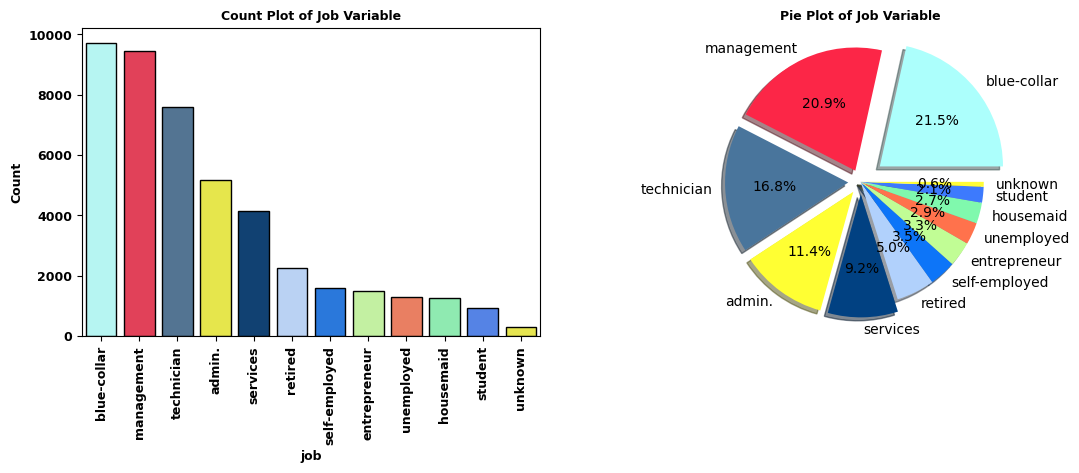

In [ ]:
#  job
colors = ['#acfffc', '#fc2647','#49759c', '#ffff33','#014182','#b1d1fc','#0d75f8','#c1fd95','#ff724c','#80f9ad','#3d7afd','#fffd37','#c79fef']
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='job', data=data, palette=colors, edgecolor='black',
                   order=data['job'].value_counts().index, width=0.8)


plt.title('Count Plot of Job Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('job', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['job'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.2, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0 , 0.0, 0.0, 0.0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Job Variable', fontsize=9, fontweight='bold')

plt.show()

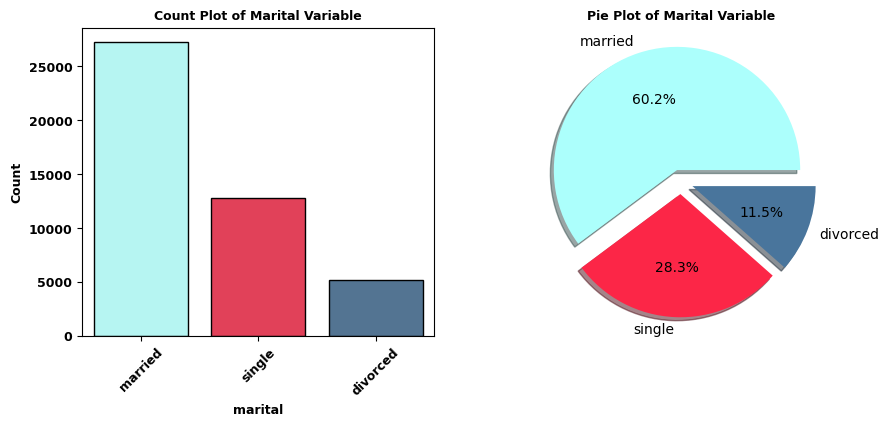

In [ ]:
#marital status
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='marital', data=data, palette=colors, edgecolor='black',
                   order=data['marital'].value_counts().index, width=0.8)



plt.title('Count Plot of Marital Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('marital', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['marital'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Marital Variable', fontsize=9, fontweight='bold')

plt.show()

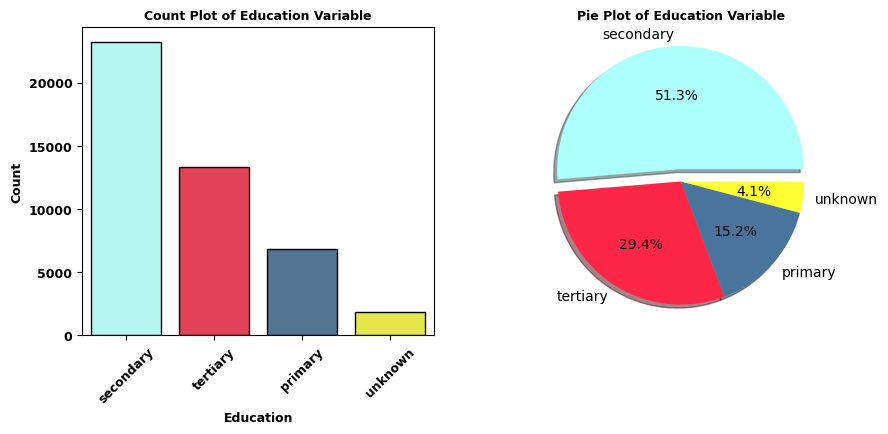

In [ ]:
#Education Charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='education', data=data, palette=colors, edgecolor='black',
                   order=data['education'].value_counts().index, width=0.8)



plt.title('Count Plot of Education Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Education', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['education'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Education Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#unknown Education acts like missing value since it is a small% of total data. However, if we have a very small sample size we should keep this value

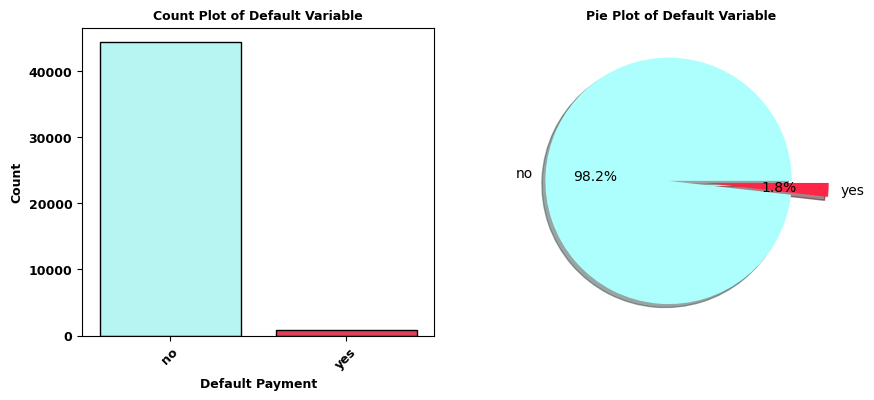

In [ ]:
#default feature (missing a payment) charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='default', data=data, palette=colors, edgecolor='black',
                   order=data['default'].value_counts().index, width=0.8)


plt.title('Count Plot of Default Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Default Payment', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['default'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.2])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Default Variable', fontsize=9, fontweight='bold')

plt.show()

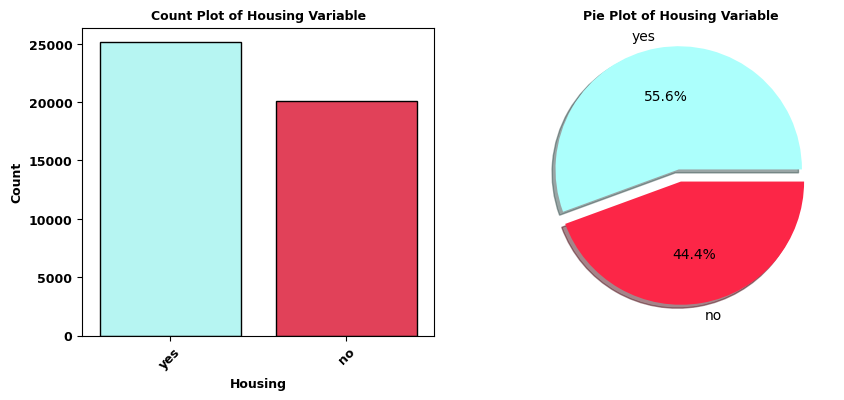

In [ ]:
#housing
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='housing', data=data, palette=colors, edgecolor='black',
                   order=data['housing'].value_counts().index, width=0.8)



plt.title('Count Plot of Housing Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Housing', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['housing'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Housing Variable', fontsize=9, fontweight='bold')

plt.show()

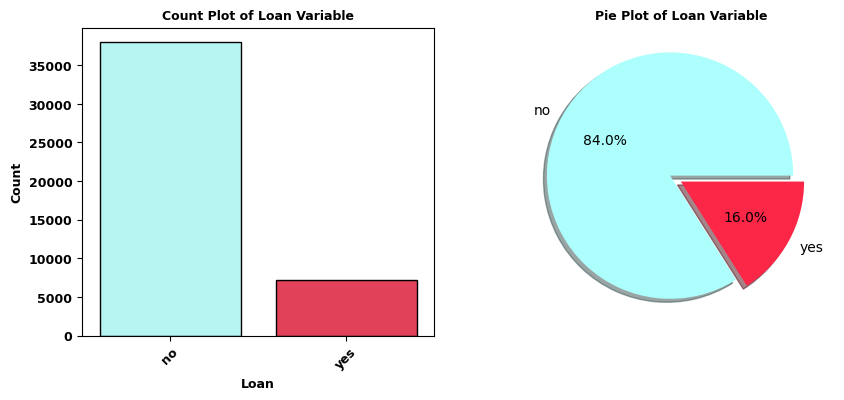

In [ ]:
#Loan chart
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='loan', data=data, palette=colors, edgecolor='black',
                   order=data['loan'].value_counts().index, width=0.8)



plt.title('Count Plot of Loan Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Loan', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['loan'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Loan Variable', fontsize=9, fontweight='bold')

plt.show()

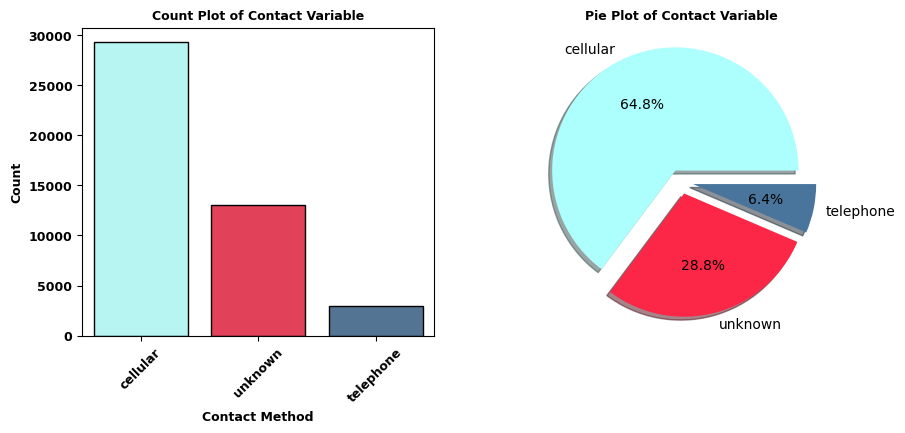

In [ ]:
#Contact Method Charts
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='contact', data=data, palette=colors, edgecolor='black',
                   order=data['contact'].value_counts().index, width=0.8)



plt.title('Count Plot of Contact Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Contact Method', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['contact'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Contact Variable', fontsize=9, fontweight='bold')

plt.show()

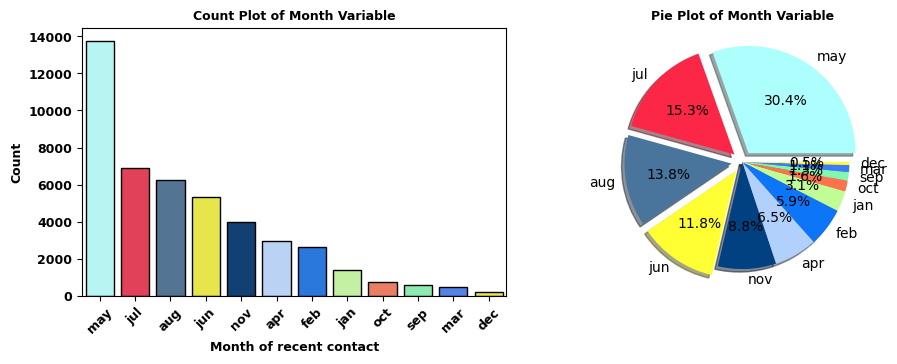

In [ ]:
#Month of the contact
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='month', data=data, palette=colors, edgecolor='black',
                   order=data['month'].value_counts().index, width=0.8)


plt.title('Count Plot of Month Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Month of recent contact', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['month'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0 ,0 ,0 ,0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Month Variable', fontsize=9, fontweight='bold')
plt.tight_layout(pad=2)

plt.show()

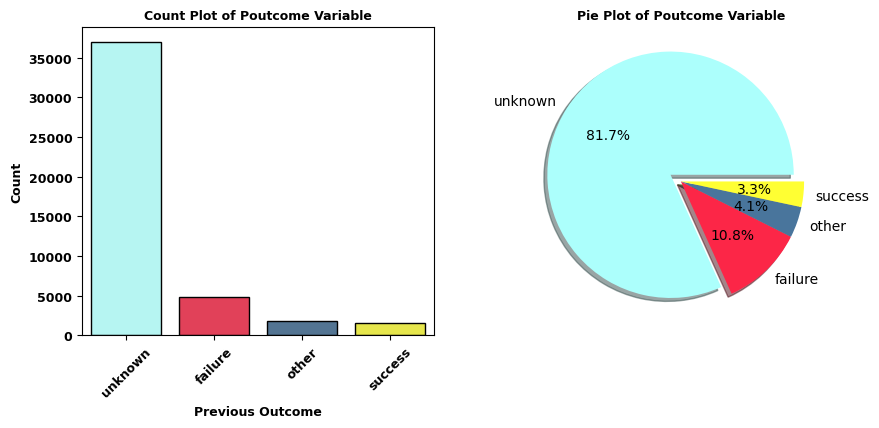

In [ ]:
#Previous Outcome
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='poutcome', data=data, palette=colors, edgecolor='black',
                   order=data['poutcome'].value_counts().index, width=0.8)



plt.title('Count Plot of Poutcome Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Previous Outcome', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['poutcome'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Poutcome Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#We can't eliminate unknown in poutcome here. This is the result of previous campaigns and big portion of our data

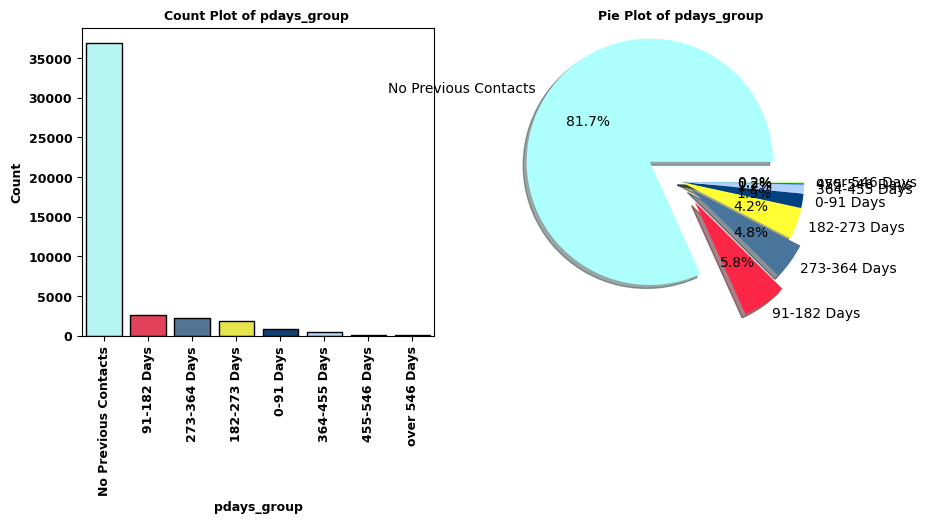

In [ ]:
#pdays_group
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='pdays_group', data=data, palette=colors, edgecolor='black',
                   order=data['pdays_group'].value_counts().index, width=0.8)



plt.title('Count Plot of pdays_group ', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('pdays_group', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['pdays_group'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.3, 0.2, 0.1,0,0,0,0,0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of pdays_group', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
# after checking the # and % of those customers with no previous contacts we can see the reason we have "Unknown" previous outcome is because they haven't been contacted before. similar %

In [ ]:
#We would like to eliminate or drop those rows with Unknow Job:
data[data['job'] == 'unknown']

age      job   marital education default  balance housing loan  \
4       33  unknown    single   unknown      no        1      no   no   
216     47  unknown   married   unknown      no       28      no   no   
354     59  unknown  divorced   unknown      no       27      no   no   
876     37  unknown    single   unknown      no      414     yes   no   
1072    29  unknown    single   primary      no       50     yes   no   
...    ...      ...       ...       ...     ...      ...     ...  ...   
44714   45  unknown   married  tertiary      no      406      no   no   
44742   64  unknown   married   unknown      no     2799      no   no   
44970   28  unknown    single   unknown      no      326      no   no   
45141   77  unknown   married   unknown      no      397      no   no   
45186   59  unknown   married   unknown      no     1500      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
4        unknown    5   may       198              1     -1                0   
216      unknown    5   may       338              2     -1                0   
354      unknown    5   may       347              3     -1                0   
876      unknown    7   may       131              1     -1                0   
1072     unknown    7   may        50              2     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
44714   cellular    7   sep       314              1     -1                0   
44742  telephone    9   sep       378              4     -1                0   
44970   cellular   11   oct       450              1    231                1   
45141  telephone    8   nov       207              1    185                3   
45186   cellular   16   nov       280              1    104                2   

      poutcome      target           pdays_group first_campaign  
4      unknown  no-deposit  No Previous Contacts              y  
216    unknown  no-deposit  No Previous Contacts              y  
354    unknown  no-deposit  No Previous Contacts              y  
876    unknown  no-deposit  No Previous Contacts              y  
1072   unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
44714  unknown     deposit  No Previous Contacts              y  
44742  unknown  no-deposit  No Previous Contacts              y  
44970  success     deposit          182-273 Days              n  
45141  success  no-deposit          182-273 Days              n  
45186  failure  no-deposit           91-182 Days              n  

[288 rows x 19 columns]

In [ ]:
#we have 288 rows with unknown job

In [ ]:
#we also would like to drop those rows with unknown Education
data[data['education'] == 'unknown']

age          job  marital education default  balance housing loan  \
3       47  blue-collar  married   unknown      no     1506     yes   no   
4       33      unknown   single   unknown      no        1      no   no   
13      58   technician  married   unknown      no       71     yes   no   
16      45       admin.   single   unknown      no       13     yes   no   
42      60  blue-collar  married   unknown      no      104     yes   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
45129   46   technician  married   unknown      no     3308      no   no   
45141   77      unknown  married   unknown      no      397      no   no   
45150   65   management  married   unknown      no     2352      no   no   
45158   34      student   single   unknown      no     2321      no   no   
45186   59      unknown  married   unknown      no     1500      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
3        unknown    5   may        92              1     -1                0   
4        unknown    5   may       198              1     -1                0   
13       unknown    5   may        71              1     -1                0   
16       unknown    5   may        98              1     -1                0   
42       unknown    5   may        22              1     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
45129   cellular   27   oct       171              1     91                2   
45141  telephone    8   nov       207              1    185                3   
45150   cellular    8   nov       354              3    188               13   
45158   cellular    9   nov       600              2     99                5   
45186   cellular   16   nov       280              1    104                2   

      poutcome      target           pdays_group first_campaign  
3      unknown  no-deposit  No Previous Contacts              y  
4      unknown  no-deposit  No Previous Contacts              y  
13     unknown  no-deposit  No Previous Contacts              y  
16     unknown  no-deposit  No Previous Contacts              y  
42     unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
45129  success     deposit             0-91 Days              n  
45141  success  no-deposit          182-273 Days              n  
45150  success  no-deposit          182-273 Days              n  
45158  failure  no-deposit           91-182 Days              n  
45186  failure  no-deposit           91-182 Days              n  

[1857 rows x 19 columns]

In [ ]:
# there are 1857 rows with unknown education

In [ ]:
data.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [ ]:
data.education.value_counts(normalize=True)*100

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

In [ ]:
data.job.value_counts(normalize=True)*100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

In [ ]:
#Let's make a copy of our data before dropping Unknown education and Unknown Job
Data_all_rows = data.copy()

In [ ]:
Data_all_rows.shape

(45211, 19)

In [ ]:
#Below code will give a dataframe in which rows with unknown job and unknown education are dropped
data.drop(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  contact_count  pdays  p_contact_count  \
0        unknown    5   may       261              1     -1                0   
1        unknown    5   may       151              1     -1                0   
2        unknown    5   may        76              1     -1                0   
5        unknown    5   may       139              1     -1                0   
6        unknown    5   may       217              1     -1                0   
...          ...  ...   ...       ...            ...    ...              ...   
45206   cellular   17   nov       977              3     -1                0   
45207   cellular   17   nov       456              2     -1                0   
45208   cellular   17   nov      1127              5    184                3   
45209  telephone   17   nov       508              4     -1                0   
45210   cellular   17   nov       361              2    188               11   

      poutcome      target           pdays_group first_campaign  
0      unknown  no-deposit  No Previous Contacts              y  
1      unknown  no-deposit  No Previous Contacts              y  
2      unknown  no-deposit  No Previous Contacts              y  
5      unknown  no-deposit  No Previous Contacts              y  
6      unknown  no-deposit  No Previous Contacts              y  
...        ...         ...                   ...            ...  
45206  unknown     deposit  No Previous Contacts              y  
45207  unknown     deposit  No Previous Contacts              y  
45208  success     deposit          182-273 Days              n  
45209  unknown  no-deposit  No Previous Contacts              y  
45210    other  no-deposit          182-273 Days              n  

[43193 rows x 19 columns]

In [ ]:
#see the index for rows with Unknown education and job
(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)

Index([    3,     4,    13,    16,    42,    44,    57,    58,    64,    93,
       ...
       44983, 45022, 45055, 45098, 45109, 45129, 45141, 45150, 45158, 45186],
      dtype='int64', length=2018)

## Handiling Unknown Values : Job and Education

In [ ]:
#Let's drop Unknown education and Unknown jobs
data=data.drop(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)
data.shape

(43193, 19)

In [ ]:
#Now we have 43,193 rows of data

In [ ]:
#Working on bi-variables visualizations

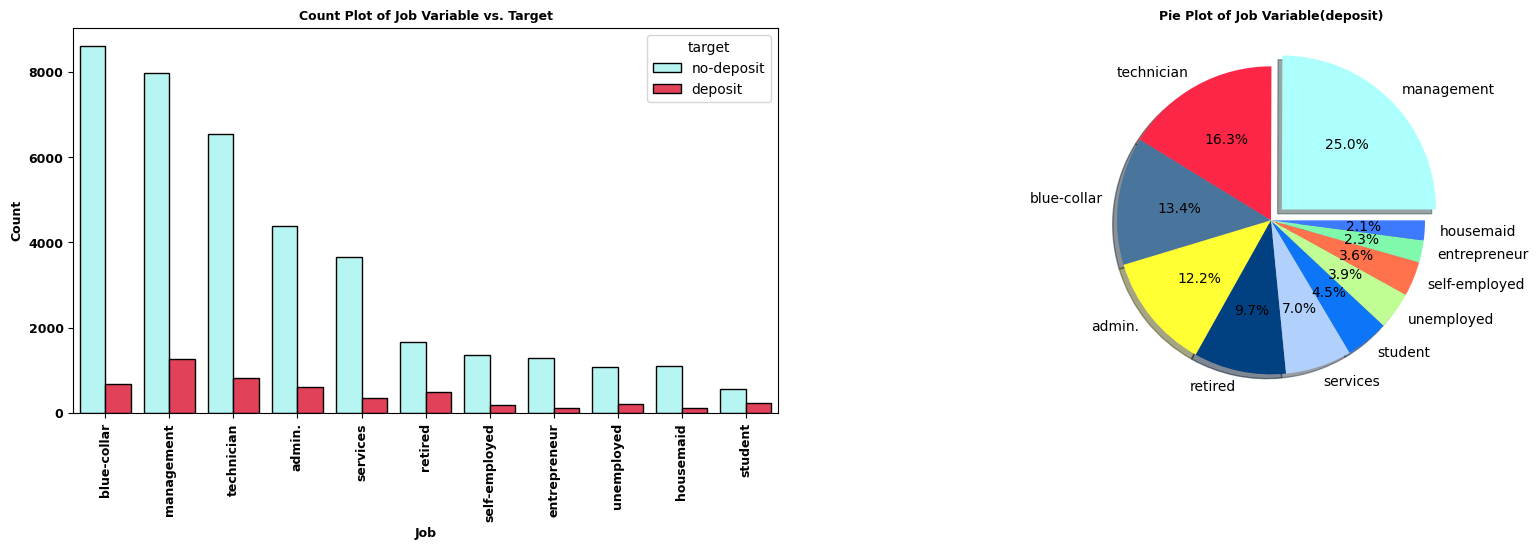

In [ ]:
# illustration of job and target for deposit and no-deposit
#pie chart shows jobs for deposit only
fig = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='job', data=data, palette=colors, edgecolor='black',
                   order=data['job'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Job Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Job', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['job'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Job Variable(deposit)', fontsize=9, fontweight='bold')

plt.show()



In [ ]:
#in pie chart we see only those jobs that have deposits. Management has the highest number

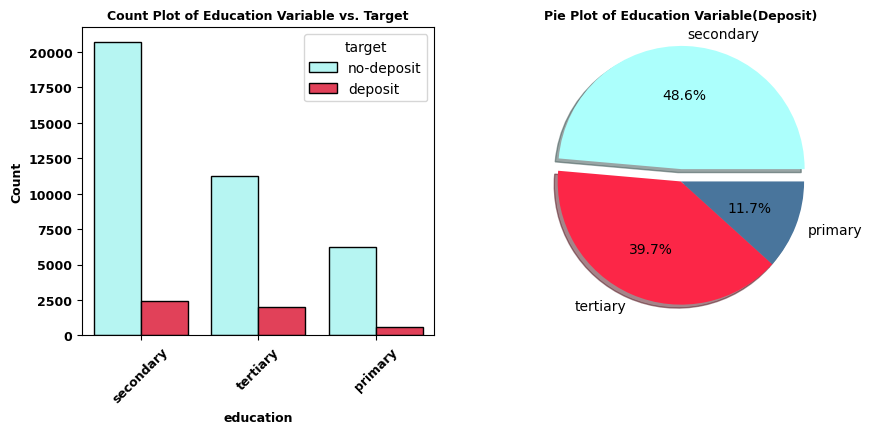

In [ ]:
#education and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='education', data=data, palette=colors, edgecolor='black',
                   order=data['education'].value_counts().index, width=0.8, hue=data['target'])


plt.title('Count Plot of Education Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('education', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['education'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Education Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

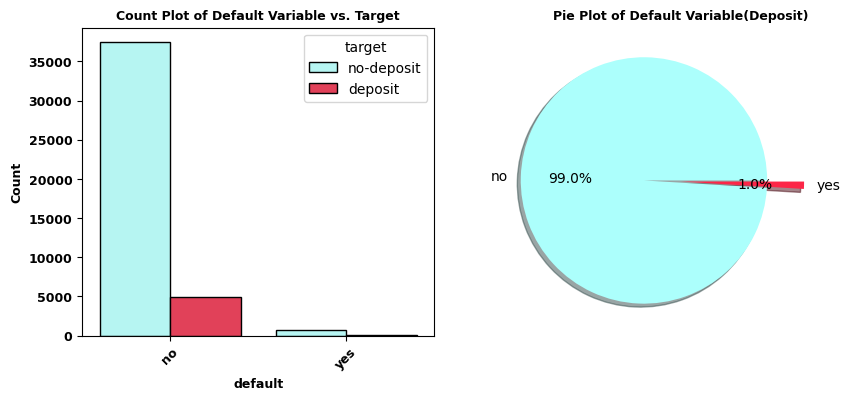

In [ ]:
#Default and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='default', data=data, palette=colors, edgecolor='black',
                   order=data['default'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Default Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('default', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['default'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.3, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Default Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

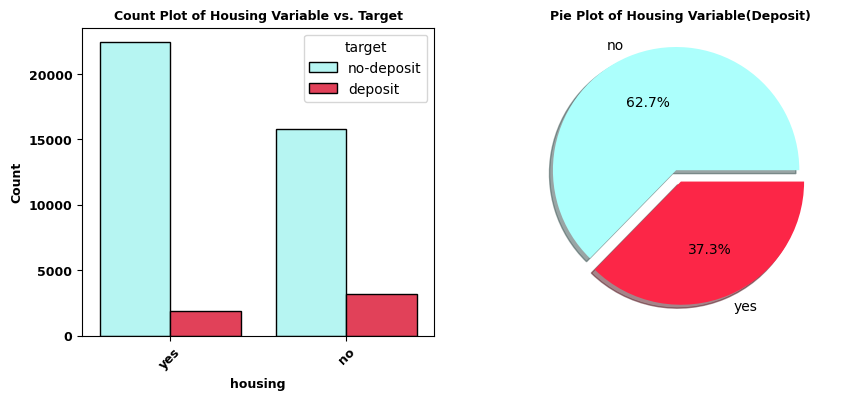

In [ ]:
#housing and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='housing', data=data, palette=colors, edgecolor='black',
                   order=data['housing'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Housing Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('housing', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['housing'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Housing Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

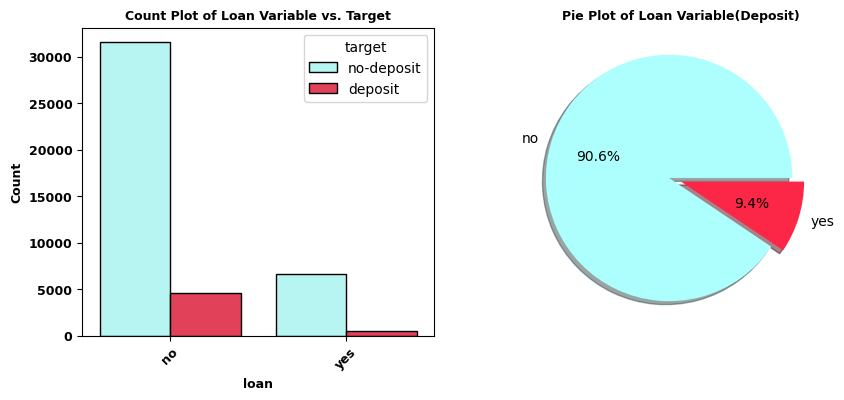

In [ ]:
#loan and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='loan', data=data, palette=colors, edgecolor='black',
                   order=data['loan'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Loan Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('loan', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['loan'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Loan Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43193 non-null  int64 
 1   job              43193 non-null  object
 2   marital          43193 non-null  object
 3   education        43193 non-null  object
 4   default          43193 non-null  object
 5   balance          43193 non-null  int64 
 6   housing          43193 non-null  object
 7   loan             43193 non-null  object
 8   contact          43193 non-null  object
 9   day              43193 non-null  int64 
 10  month            43193 non-null  object
 11  duration         43193 non-null  int64 
 12  contact_count    43193 non-null  int64 
 13  pdays            43193 non-null  int64 
 14  p_contact_count  43193 non-null  int64 
 15  poutcome         43193 non-null  object
 16  target           43193 non-null  object
 17  pdays_group      43193 non-null  obj

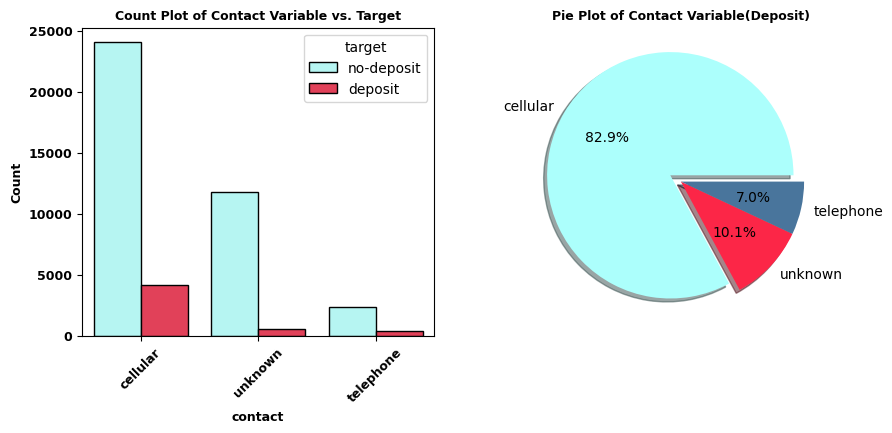

In [ ]:
#contact and target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='contact', data=data, palette=colors, edgecolor='black',
                   order=data['contact'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Contact Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('contact', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['contact'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Contact Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

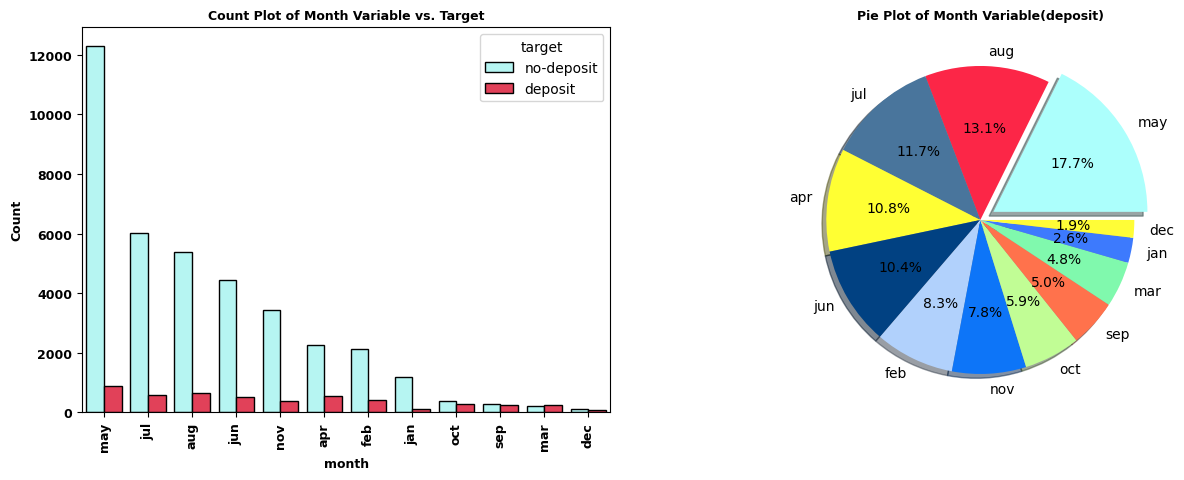

In [ ]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='month', data=data, palette=colors, edgecolor='black',
                   order=data['month'].value_counts().index, width=0.8, hue=data['target'])



plt.title('Count Plot of Month Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=90, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('month', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['month'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0, 0, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Month Variable(deposit)', fontsize=9, fontweight='bold')

plt.show()

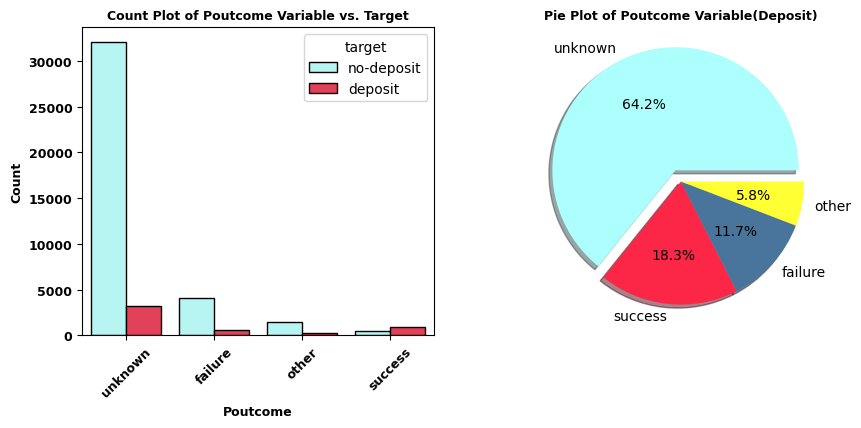

In [ ]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='poutcome', data=data, palette=colors, edgecolor='black',
                   order=data['poutcome'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of Poutcome Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Poutcome', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['poutcome'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Poutcome Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

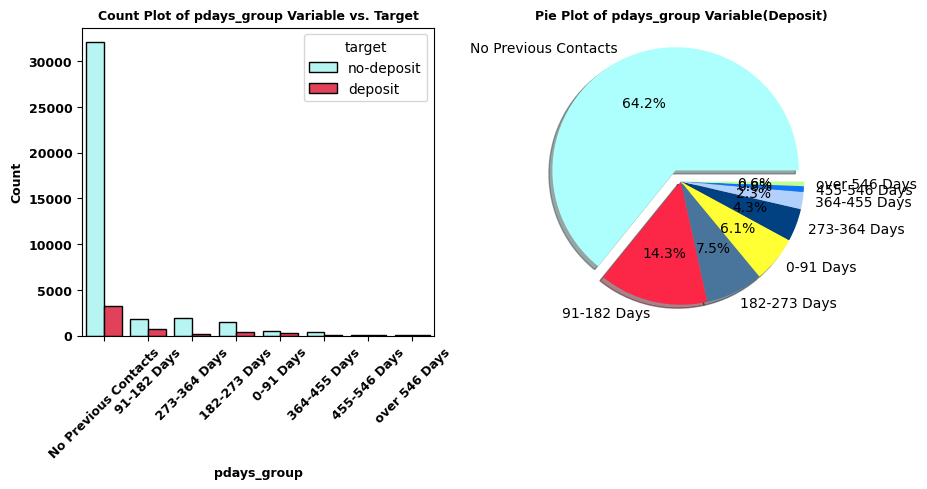

In [ ]:
#pdays group
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='pdays_group', data=data, palette=colors, edgecolor='black',
                   order=data['pdays_group'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of pdays_group Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('pdays_group', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['pdays_group'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of pdays_group Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()


#plt.subplot(1, 3, 3)
#l = data[data['target'] == 'no-deposit']['pdays_group'].value_counts()
#pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0, 0, 0, 0, 0 , 0 , 0])
#pie_plot.set_ylabel('')
#plt.title('Pie Plot of pdays_group Variable(No-Deposit)', fontsize=9, fontweight='bold')
#
#plt.show()

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

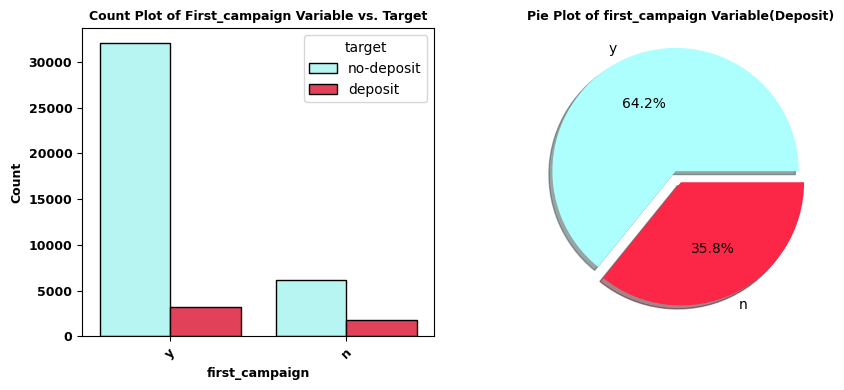

In [ ]:
#first campaign vs target
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='first_campaign', data=data, palette=colors, edgecolor='black',
                   order=data['first_campaign'].value_counts().index, width=0.8, hue='target')


plt.title('Count Plot of First_campaign Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('first_campaign', fontsize=9, fontweight='bold')



plt.subplot(1, 2, 2)
l = data[data['target'] == 'deposit']['first_campaign'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors, explode=[0.1, 0])
pie_plot.set_ylabel('')
plt.title('Pie Plot of first_campaign Variable(Deposit)', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
data.first_campaign.value_counts(normalize=True)*100

first_campaign
y    81.682217
n    18.317783
Name: proportion, dtype: float64

In [ ]:
#65% of those who opened deposit are those who have not been contacted in previous campaigns
#This could imply that the bank has a high chance in convincing clients of their untapped market

In [ ]:
# we also need to consider that 82% of people we targetted were new and first campaign

In [ ]:
#numerical Features visualization:

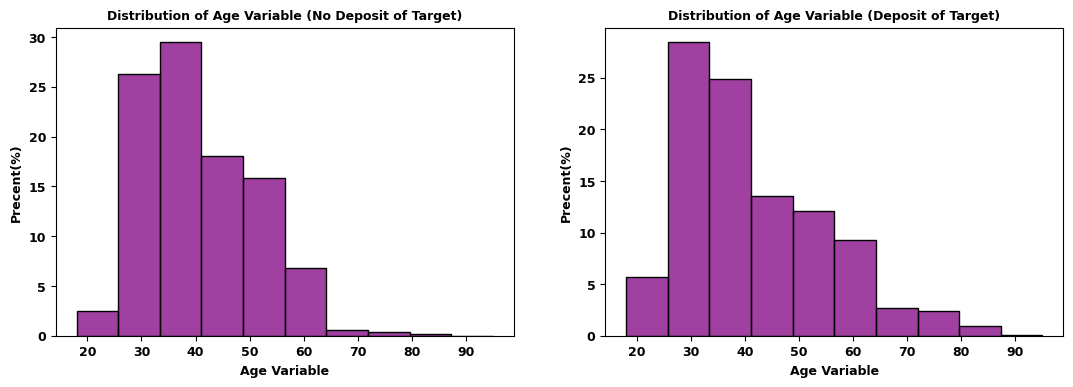

In [ ]:
#age
fig = plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))
plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='age', color='purple',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Age Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Age Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='age', color='purple',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Age Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Age Variable', fontsize=9, fontweight='bold')

plt.show()

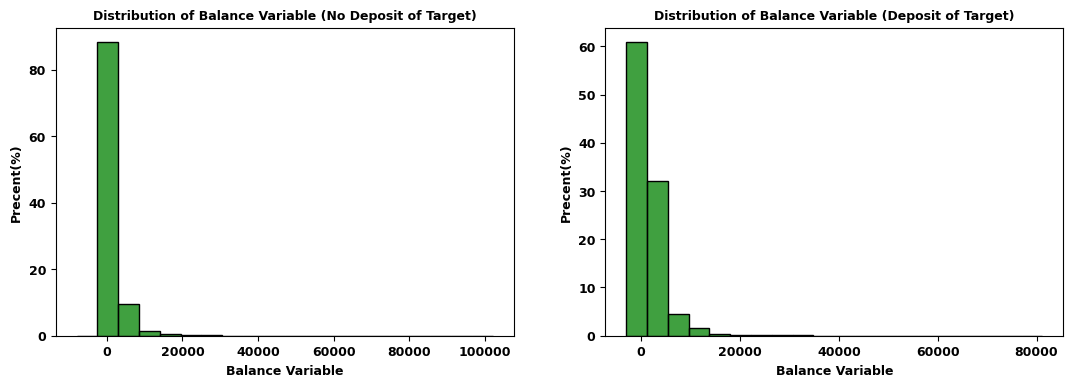

In [ ]:
#balance
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='balance', color='green',
             edgecolor='black', stat='percent', element='bars', bins=20)

plt.title('Distribution of Balance Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Balance Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='balance', color='green',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Balance Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Balance Variable', fontsize=9, fontweight='bold')


plt.show()

In [ ]:
#there are 3634 rows with negative balance, this project includes all balanaces

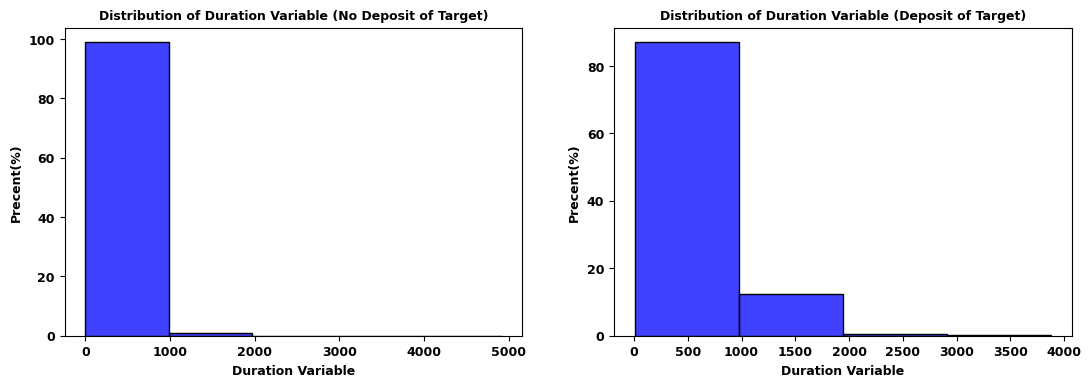

In [ ]:
#duration vs target
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='duration', color='blue',
             edgecolor='black', stat='percent', element='bars', bins=5)

plt.title('Distribution of Duration Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Duration Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='duration', color='blue',
             edgecolor='black', stat='percent', element='bars', bins=4)


plt.title('Distribution of Duration Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Duration Variable', fontsize=9, fontweight='bold')


plt.show()

In [ ]:
#duration of calls to those clients with no deposit barely exceed 1000 seconds (almost 95% are less than 1000) but duration of calls to clients who opened deposit account are longer

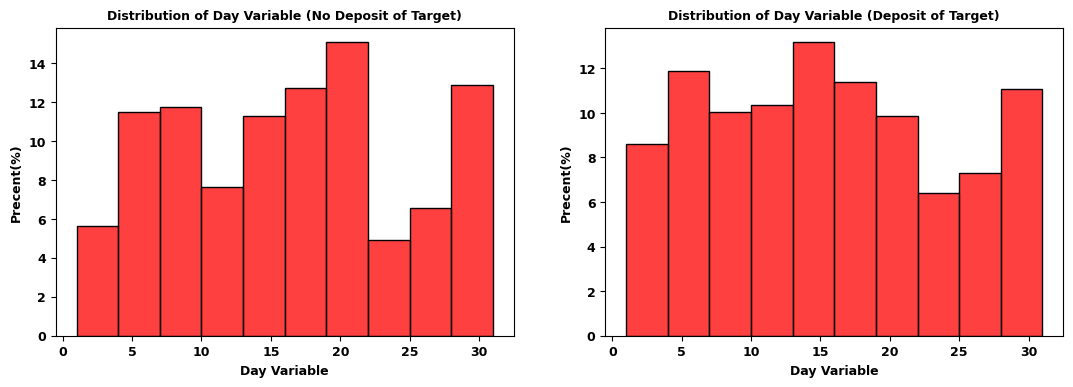

In [ ]:
#day (day of the month) vs target
fig=plt.subplots(nrows=1, ncols=2, figsize=(13 , 4))

plt.subplot(1, 2,1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='day', color='red',
             edgecolor='black', stat='percent', element='bars', bins=10)

plt.title('Distribution of Day Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Day Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='day', color='red',
             edgecolor='black', stat='percent', element='bars', bins=10)


plt.title('Distribution of Day Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Day Variable', fontsize=9, fontweight='bold')


plt.show()

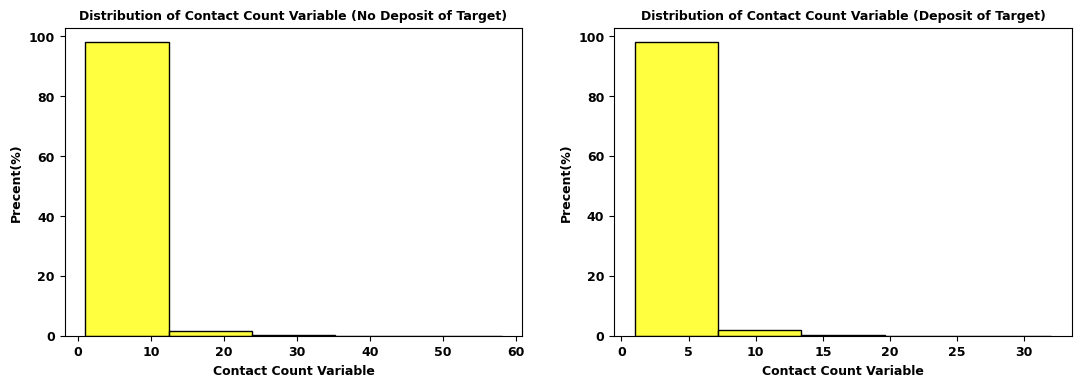

In [ ]:
#Campaign : further renamed to contact_count
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='contact_count', color='yellow', edgecolor='black', stat='percent', element='bars', bins=5)


plt.title('Distribution of Contact Count Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Contact Count Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='contact_count', color='yellow', edgecolor='black', stat='percent', element='bars', bins=5)


plt.title('Distribution of Contact Count Variable (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Contact Count Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#almost 95% of clients who opened deposit have been contacted up to 7-8 times,  but those who didn't open deposit have been contacted about 11-12 times
# this could imply that majority of clients who are interetsed in opening account, will do so after 7-8 times of
#Suggestion: Call Center employees may limit the number of calls to each customer to 8

In [ ]:
#checking deposit/no-deposit vs contact count
pd.crosstab(index=data['contact_count'], columns=data['target'])


target         deposit  no-deposit
contact_count                     
1                 2431       14311
2                 1323       10615
3                  587        4690
4                  302        3097
5                  136        1567
6                   89        1145
7                   45         651
8                   30         486
9                   20         287
10                  13         242
11                  15         175
12                   4         145
13                   6         117
14                   4          81
15                   4          77
16                   2          73
17                   5          60
18                   0          47
19                   0          43
20                   1          41
21                   1          32
22                   0          20
23                   0          20
24                   1          19
25                   0          22
26                   0          12
27                   0           9
28                   0          16
29                   1          12
30                   0           8
31                   0          11
32                   1           8
33                   0           6
34                   0           4
35                   0           3
36                   0           4
37                   0           1
38                   0           3
39                   0           1
41                   0           2
43                   0           2
44                   0           1
46                   0           1
50                   0           2
51                   0           1
55                   0           1
58                   0           1

In [ ]:
#it also approves that after certain number of calls (13-15) making more phone calls will not change customers' mind. Most customers make their decisions with less than 15 calls

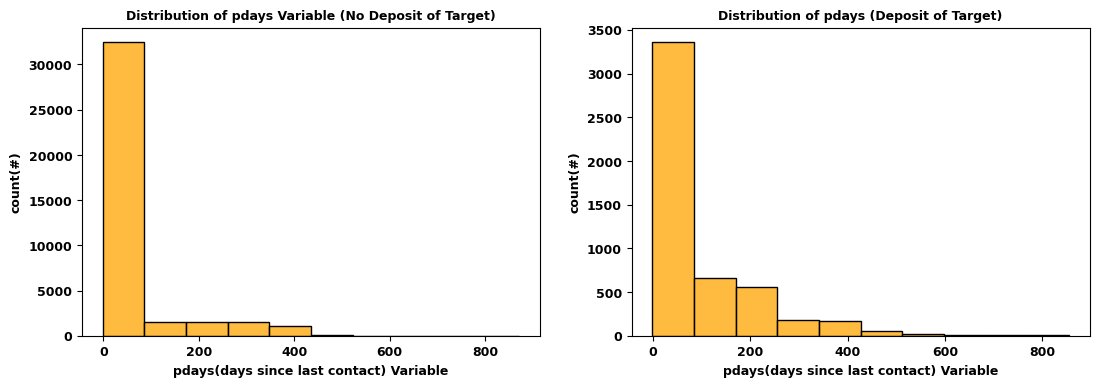

In [ ]:
#pdays- number of days since last contact
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='pdays', color='orange', edgecolor='black', stat='count', element='bars', bins=10)


plt.title('Distribution of pdays Variable (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('count(#)', fontsize=9, fontweight='bold')
plt.xlabel('pdays(days since last contact) Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='pdays', color='orange', edgecolor='black', stat='count', element='bars', bins=10)


plt.title('Distribution of pdays (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('count(#)', fontsize=9, fontweight='bold')
plt.xlabel('pdays(days since last contact) Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#indicates those clients who have been contacted more recent, are less likely to open term deposit account

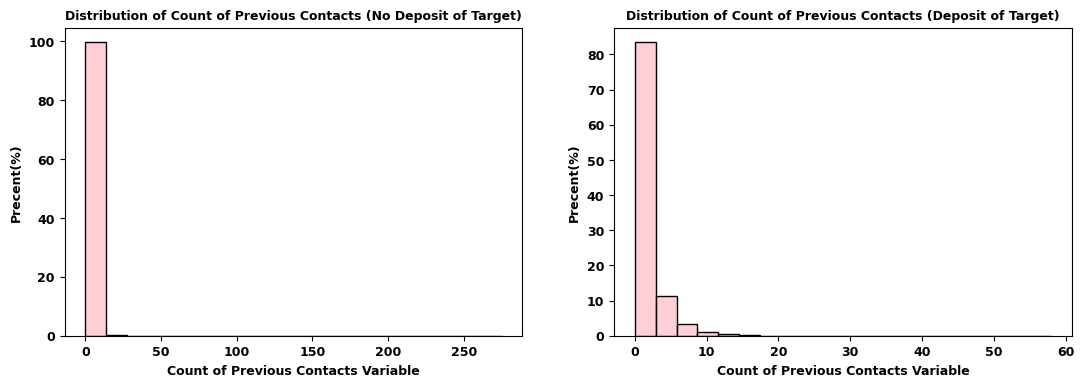

In [ ]:
#previous( further changed to p_contact_count) : number of previous contacts to same client
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data=data[data['target'] == 'no-deposit'], x='p_contact_count', color='pink',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data=data[data['target'] == 'deposit'], x='p_contact_count', color='pink',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#over 95% of those who didn't open account have been contacted up to 25 times, 95% of those who opened deposit were contacted upto 9 times.
#We should also mention that we have 35281 clients that have not been contacted before meaning number 0 can highly impact our avarage number of calls

In [ ]:
pd.crosstab(index=data['p_contact_count'], columns=data['target'])

target           deposit  no-deposit
p_contact_count                     
0                   3222       32059
1                    538        2113
2                    429        1575
3                    284         812
4                    166         527
5                    115         328
6                     82         186
7                     49         146
8                     38          89
9                     22          66
10                    25          38
11                    13          47
12                     9          33
13                     9          27
14                     5          14
15                     1          19
16                     0          13
17                     3          12
18                     0           6
19                     2           9
20                     1           7
21                     1           3
22                     1           5
23                     1           7
24                     0           5
25                     0           4
26                     1           1
27                     0           4
28                     0           2
29                     1           3
30                     1           2
32                     0           1
35                     0           1
37                     0           2
38                     0           2
40                     0           1
41                     0           1
51                     0           1
55                     1           0
58                     1           0
275                    0           1

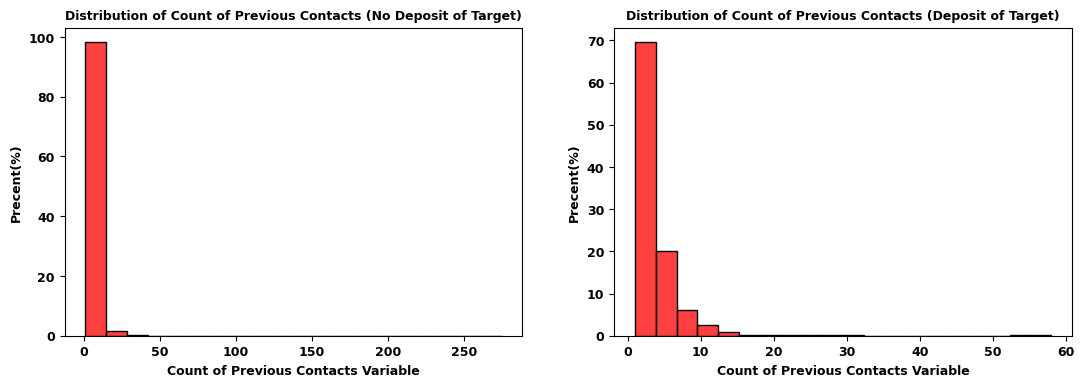

In [ ]:
#testing same charts but this time we eliminate first campaigns
#previous( further changed to p_contact_count) : number of previous contacts to this client
fig = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.histplot(data[(data['target'] == 'no-deposit') & (data['first_campaign'] == 'n')], x='p_contact_count', color='red',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (No Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
sns.histplot(data[(data['target'] == 'deposit') & (data['first_campaign'] == 'n')], x='p_contact_count', color='red',
             edgecolor='black', stat='percent', element='bars', bins=20)


plt.title('Distribution of Count of Previous Contacts (Deposit of Target)', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Precent(%)', fontsize=9, fontweight='bold')
plt.xlabel('Count of Previous Contacts Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#Test : Data for first campaign=='n'
#data[(data['target'] == 'no-deposit') & (data['first_campaign'] == 'n')]

In [ ]:
# not much difference even after we eliminate first campaign

# **Box Plot Visualizations**

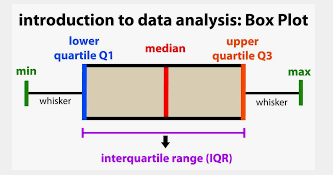

In [ ]:
#Note: upper Q3- lower Q1 = IQR (interquartile range)
#IQR * a number (usually 1.5 this means we go 1.5 times of IQR to top and to bottom to define whiskers) = X
#Min = Q1-X
#Max = Q3+X
#anything out of Min and Max are outliers

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

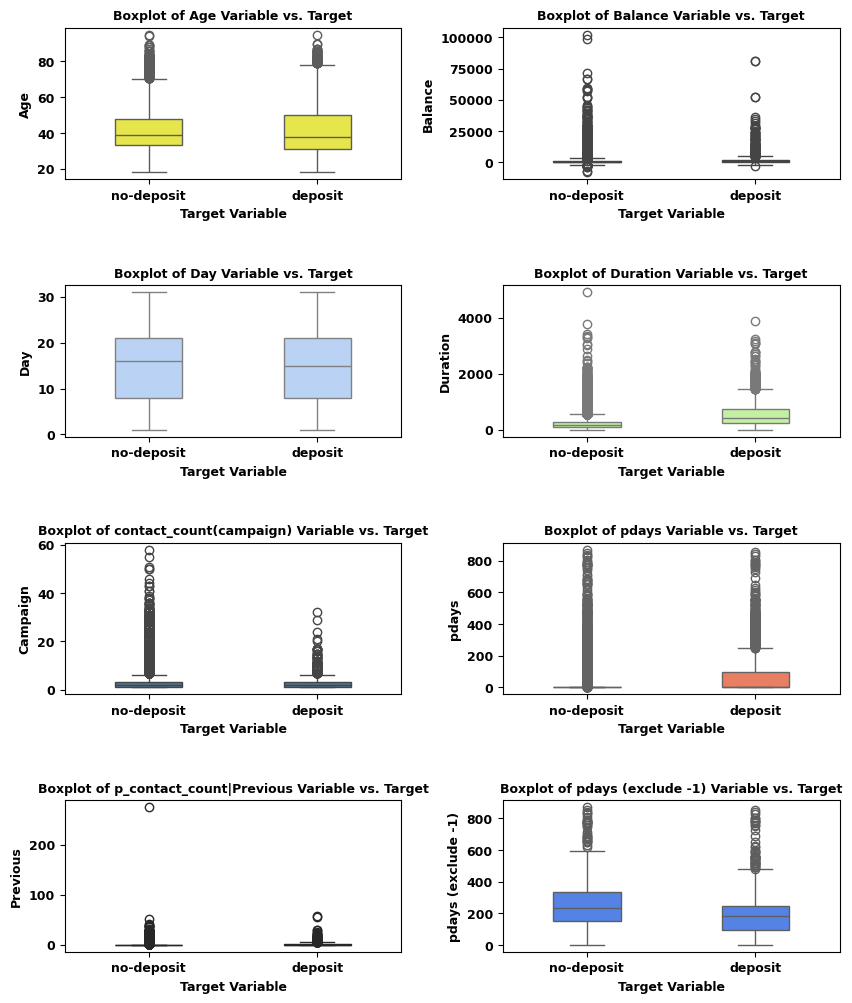

In [ ]:
#Box plot
fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.7)

#---Age
plt.subplot(4, 2, 1)
sns.boxplot(data=data, x='target', y='age', color=colors[3], width=0.4)


plt.title('Boxplot of Age Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Age', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---Balance
plt.subplot(4, 2, 2)
sns.boxplot(data=data, x='target', y='balance', color=colors[2], width=0.4)


plt.title('Boxplot of Balance Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#---day
plt.subplot(4, 2, 3)
sns.boxplot(data=data, x='target', y='day', color=colors[5], width=0.4)


plt.title('Boxplot of Day Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Day', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---duration
plt.subplot(4, 2, 4)
sns.boxplot(data=data, x='target', y='duration', color=colors[7], width=0.4)


plt.title('Boxplot of Duration Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Duration', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---campaign|contact-count
plt.subplot(4, 2, 5)
sns.boxplot(data=data, x='target', y='contact_count', color=colors[2], width=0.4)


plt.title('Boxplot of contact_count(campaign) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Campaign', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---pdays
plt.subplot(4, 2, 6)
sns.boxplot(data=data, x='target', y='pdays', color=colors[8], width=0.4)


plt.title('Boxplot of pdays Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('pdays', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

#---previous contact counts
plt.subplot(4, 2, 7)
sns.boxplot(data=data, x='target', y='p_contact_count', color=colors[4], width=0.4)


plt.title('Boxplot of p_contact_count|Previous Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Previous', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#Delete the last plot
#fig.delaxes(ax[3, 1])

#Adding a new box plot to view pdays eliminating first campaign

#pdays eliminating -1
plt.subplot(4, 2, 8)
sns.boxplot(data=data[data['first_campaign'] == 'n'], x='target', y='pdays', color=colors[10], width=0.4)


plt.title('Boxplot of pdays (exclude -1) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('pdays (exclude -1)', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')




plt.show()

Text(0.5, 0, 'Target Variable')

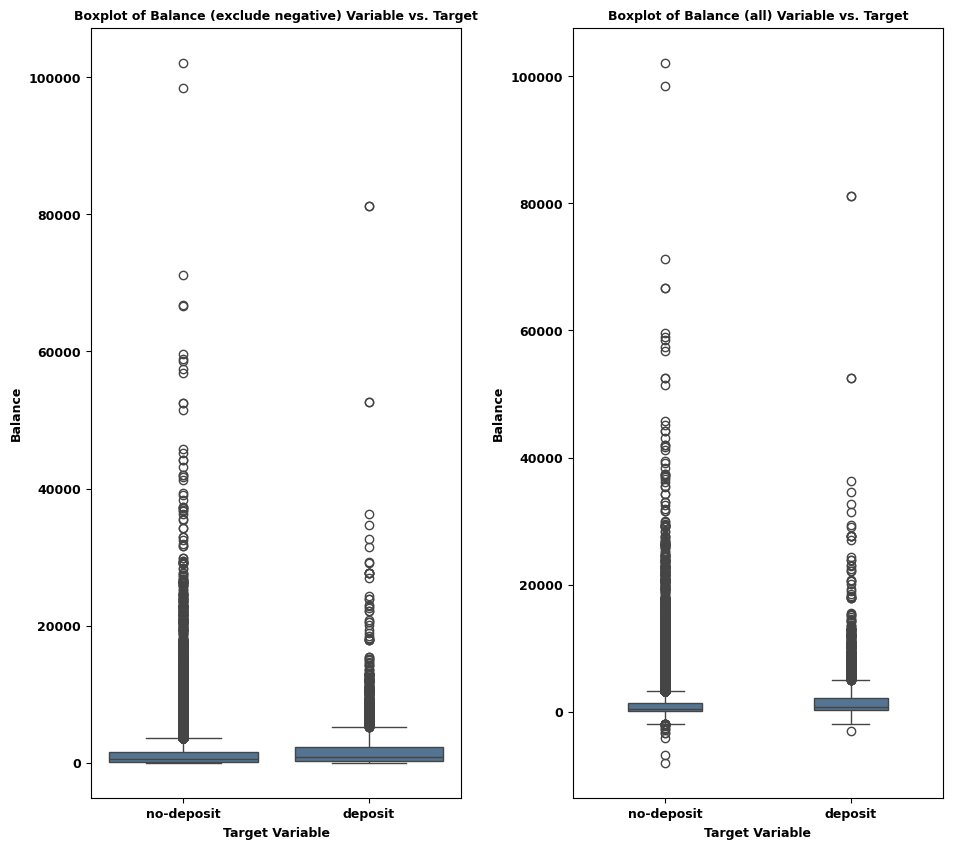

In [ ]:
#let's assume we eliminate negative balance
#---Balance

#Box plot
fig, ax= plt.subplots(nrows=4, ncols=2, figsize=(11, 10))
plt.subplots_adjust(wspace=0.3, hspace=2)

plt.subplot(1,2,1)
sns.boxplot(data=data[data['balance'] >= 0], x='target', y='balance', color=colors[2], width=0.8)


plt.title('Boxplot of Balance (exclude negative) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')


#compare with all balances
#---Balance
plt.subplot(1,2,2)
sns.boxplot(data=data, x='target', y='balance', color=colors[2], width=0.4)


plt.title('Boxplot of Balance (all) Variable vs. Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Balance', fontsize=9, fontweight='bold')
plt.xlabel('Target Variable', fontsize=9, fontweight='bold')

In [ ]:
#Majority of balances<0 belong to no-deposit.

In [ ]:
data.describe().T

count         mean          std     min    25%    50%  \
age              43193.0    40.764082    10.512640    18.0   33.0   39.0   
balance          43193.0  1354.027342  3042.103625 -8019.0   71.0  442.0   
day              43193.0    15.809414     8.305970     1.0    8.0   16.0   
duration         43193.0   258.323409   258.162006     0.0  103.0  180.0   
contact_count    43193.0     2.758178     3.063987     1.0    1.0    2.0   
pdays            43193.0    40.404070   100.420624    -1.0   -1.0   -1.0   
p_contact_count  43193.0     0.584863     2.332672     0.0    0.0    0.0   

                    75%       max  
age                48.0      95.0  
balance          1412.0  102127.0  
day                21.0      31.0  
duration          318.0    4918.0  
contact_count       3.0      58.0  
pdays              -1.0     871.0  
p_contact_count     0.0     275.0

In [ ]:
#looking at pdays Min, 1st qtr, 2nd qtr, 3rd qtr are same.That's why we don't see a box plot.This is because we have over 80% of data as -1 .

In [ ]:
#for those variables that you don't get a good graph use violonplot or swarmplot

In [ ]:
#boxplot of marital/age , and job/age for both deposit and no-deposit

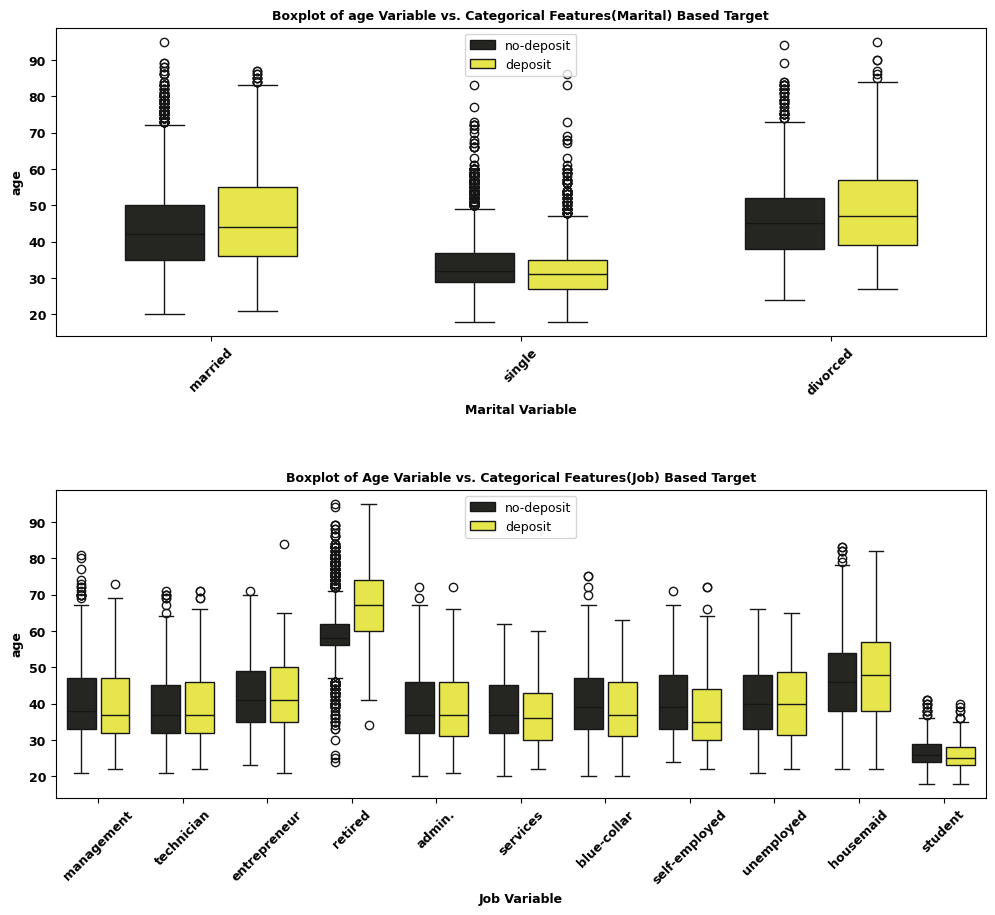

In [ ]:
fig = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust( hspace=0.5)

plt.subplot(2, 1, 1)
sns.boxplot(data=data, x='marital', y='age', color=colors[3], width=0.6, hue='target', gap=0.15)


plt.title('Boxplot of age Variable vs. Categorical Features(Marital) Based Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold', rotation=45)
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('age', fontsize=9, fontweight='bold')
plt.xlabel('Marital Variable', fontsize=9, fontweight='bold')
plt.legend(loc='upper center', fontsize=9)


plt.subplot(2, 1, 2)
sns.boxplot(data=data, x='job', y='age', color=colors[3], width=0.8, hue='target', gap=0.15)


plt.title('Boxplot of Age Variable vs. Categorical Features(Job) Based Target', fontsize=9, fontweight='bold')
plt.xticks(fontsize=9, fontweight='bold', rotation=45)
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('age', fontsize=9, fontweight='bold')
plt.legend(loc='upper center', fontsize=9)
plt.xlabel('Job Variable', fontsize=9, fontweight='bold')

plt.show()

# **Scatter Plot Visualizations**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#define a function to get variables and illustrate the chart
def plot_scatter(dataframe, column1, column2, title=None, xlabel=None, ylabel=None, hue=None):
    if column1 not in dataframe.columns or column2 not in dataframe.columns:
        raise ValueError(f"Columns {column1} and {column2} must exist in the dataframe.")
    if not pd.api.types.is_numeric_dtype(dataframe[column1]) or not pd.api.types.is_numeric_dtype(dataframe[column2]):
        raise ValueError(f"Columns {column1} and {column2} must be numeric.")

    plt.figure(figsize=(7, 4))


    scatter_plot = sns.scatterplot(data=dataframe, x=column1, y=column2, hue=hue, edgecolor=None, s=20)
    sns.regplot(data=dataframe, x=column1, y=column2, scatter=False, color='black')

    scatter_plot.set_title(title if title else 'Scatter Plot', fontsize=9, fontweight='bold')
    scatter_plot.set_xlabel(xlabel if xlabel else column1, fontsize=9, fontweight='bold')
    scatter_plot.set_ylabel(ylabel if ylabel else column2, fontsize=9, fontweight='bold')

    plt.show()

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'contact_count', 'pdays',
       'p_contact_count', 'poutcome', 'target', 'pdays_group',
       'first_campaign'],
      dtype='object')

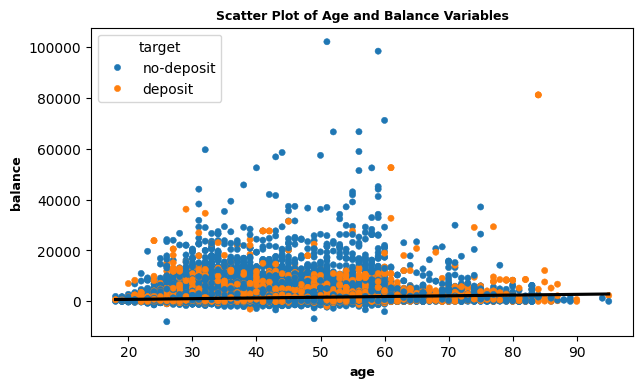

In [ ]:
plot_scatter(data, 'age', 'balance', hue='target', title='Scatter Plot of Age and Balance Variables')

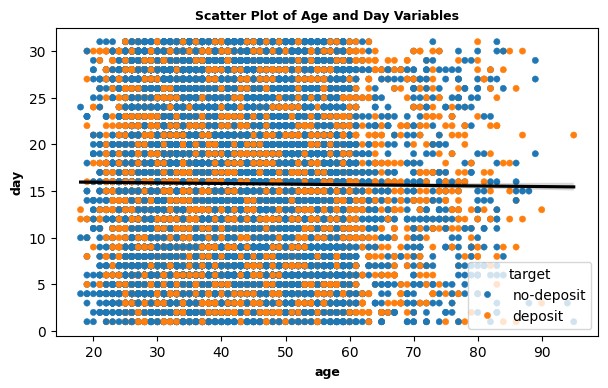

In [ ]:
plot_scatter(data, 'age', 'day', hue='target', title='Scatter Plot of Age and Day Variables')

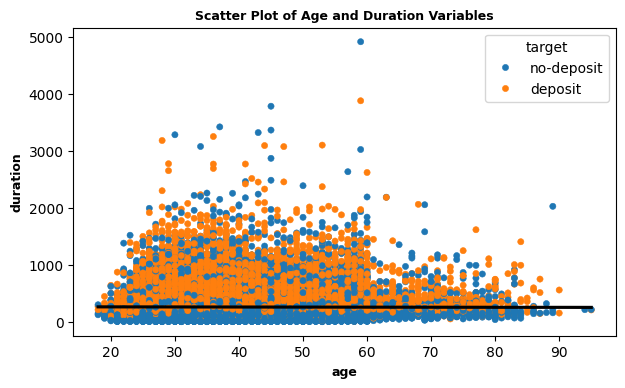

In [ ]:
plot_scatter(data, 'age', 'duration', hue='target', title='Scatter Plot of Age and Duration Variables')

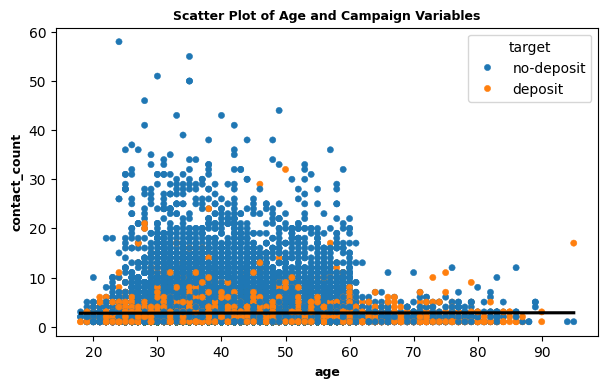

In [ ]:
plot_scatter(data, 'age', 'contact_count', hue='target', title='Scatter Plot of Age and Campaign Variables')

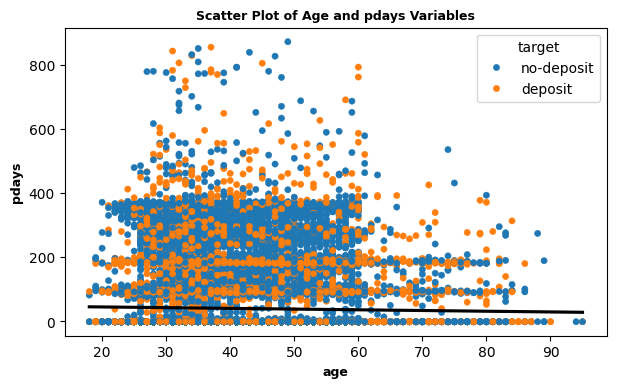

In [ ]:
plot_scatter(data, 'age', 'pdays', hue='target', title='Scatter Plot of Age and pdays Variables')

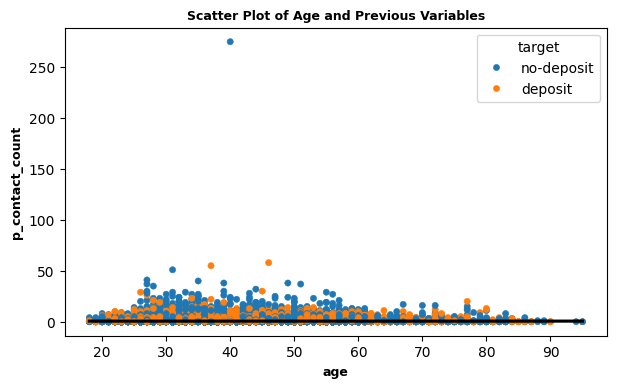

In [ ]:
plot_scatter(data, 'age', 'p_contact_count', hue='target', title='Scatter Plot of Age and Previous Variables')

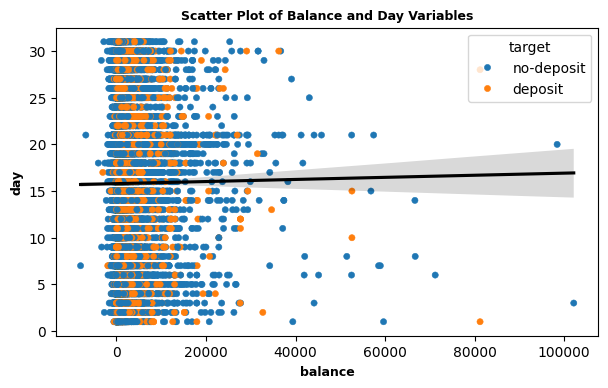

In [ ]:
plot_scatter(data, 'balance', 'day', hue='target', title='Scatter Plot of Balance and Day Variables')

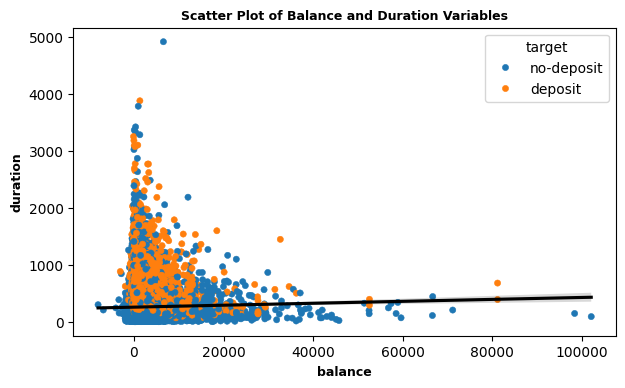

In [ ]:
plot_scatter(data, 'balance', 'duration', hue='target', title='Scatter Plot of Balance and Duration Variables')

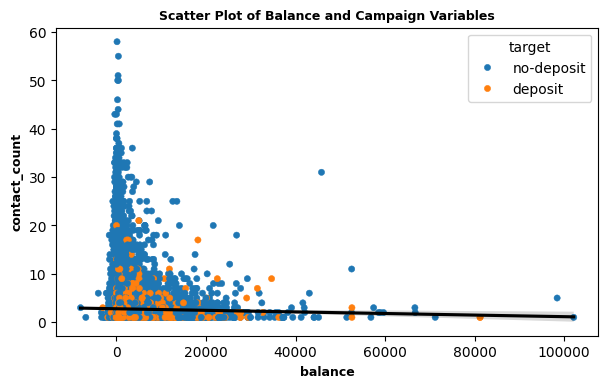

In [ ]:
plot_scatter(data, 'balance', 'contact_count', hue='target', title='Scatter Plot of Balance and Campaign Variables')

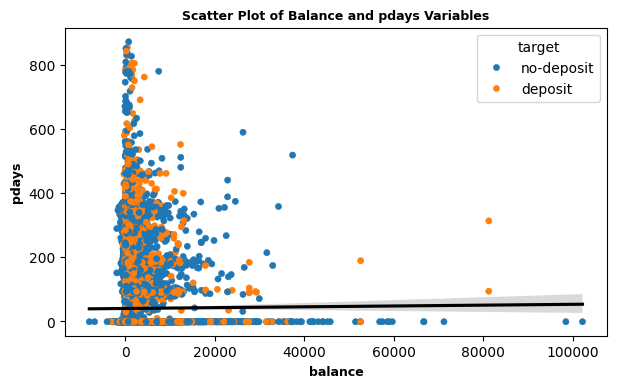

In [ ]:
plot_scatter(data, 'balance', 'pdays', hue='target', title='Scatter Plot of Balance and pdays Variables')

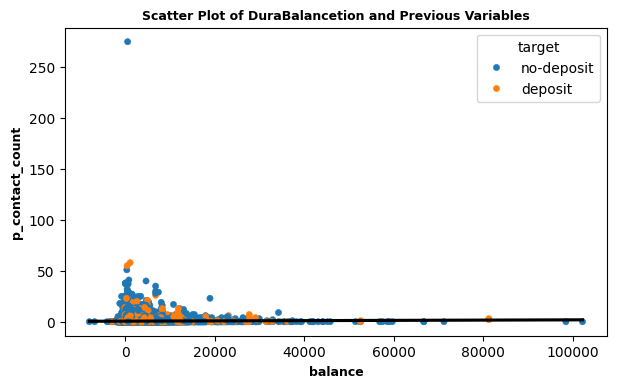

In [ ]:
plot_scatter(data, 'balance', 'p_contact_count', hue='target', title='Scatter Plot of DuraBalancetion and Previous Variables')

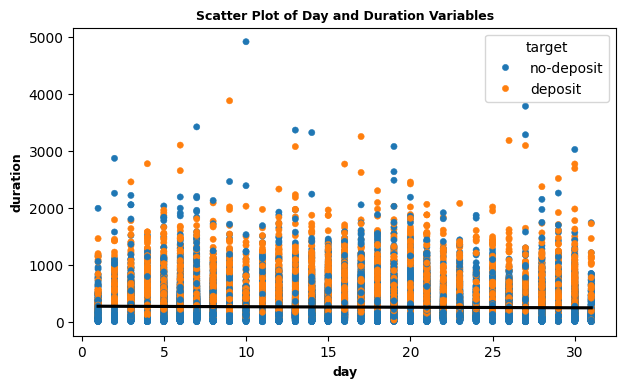

In [ ]:
plot_scatter(data, 'day', 'duration', hue='target', title='Scatter Plot of Day and Duration Variables')

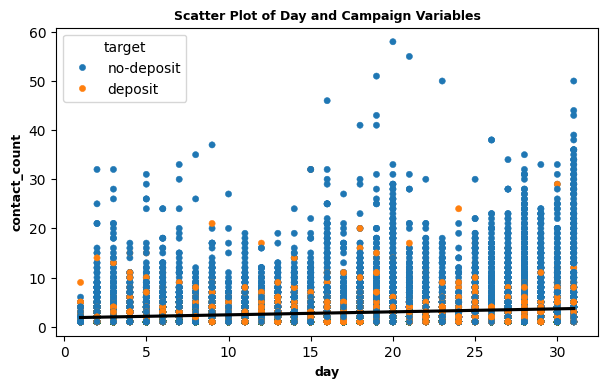

In [ ]:
plot_scatter(data, 'day', 'contact_count', hue='target', title='Scatter Plot of Day and Campaign Variables')

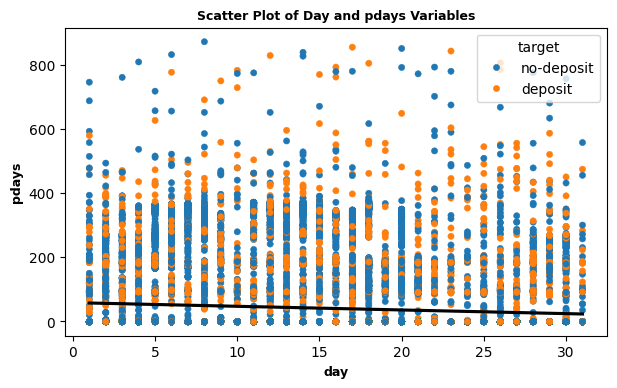

In [ ]:
plot_scatter(data, 'day', 'pdays', hue='target', title='Scatter Plot of Day and pdays Variables')

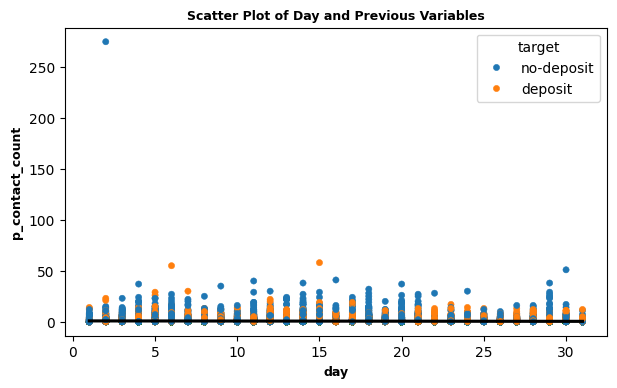

In [ ]:
plot_scatter(data, 'day', 'p_contact_count', hue='target', title='Scatter Plot of Day and Previous Variables')

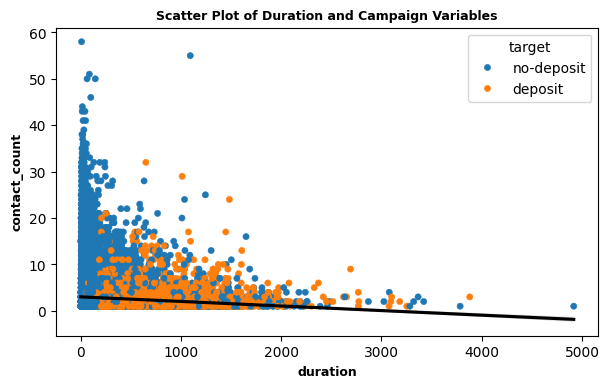

In [ ]:
plot_scatter(data, 'duration', 'contact_count', hue='target', title='Scatter Plot of Duration and Campaign Variables')

In [ ]:
#This indicates majority of deposits are within 1-10 contacts with higher average duration time

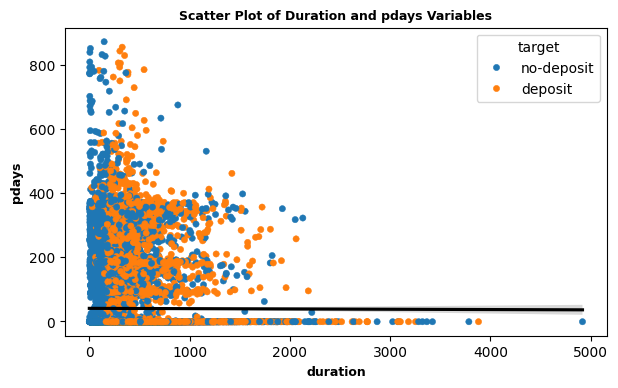

In [ ]:
plot_scatter(data, 'duration', 'pdays', hue='target', title='Scatter Plot of Duration and pdays Variables')

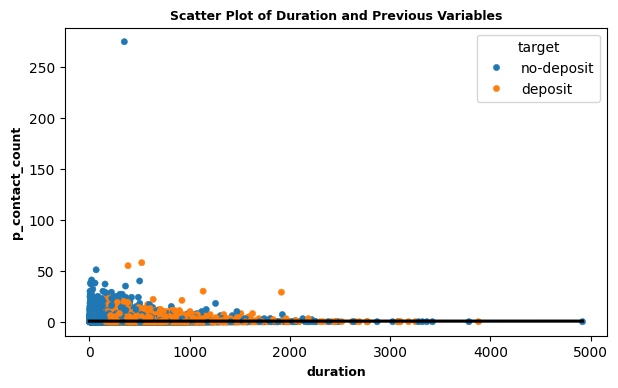

In [ ]:
plot_scatter(data, 'duration', 'p_contact_count', hue='target', title='Scatter Plot of Duration and Previous Variables')

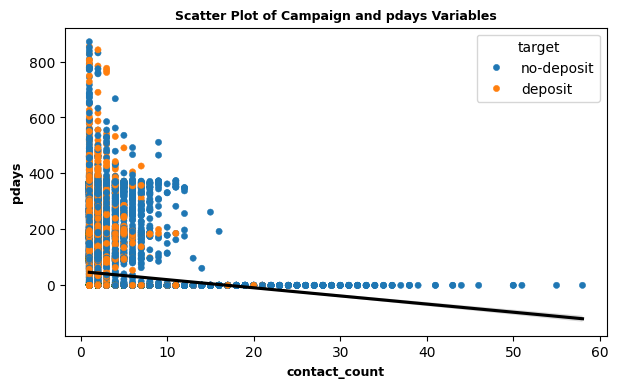

In [ ]:
plot_scatter(data, 'contact_count', 'pdays', hue='target', title='Scatter Plot of Campaign and pdays Variables')

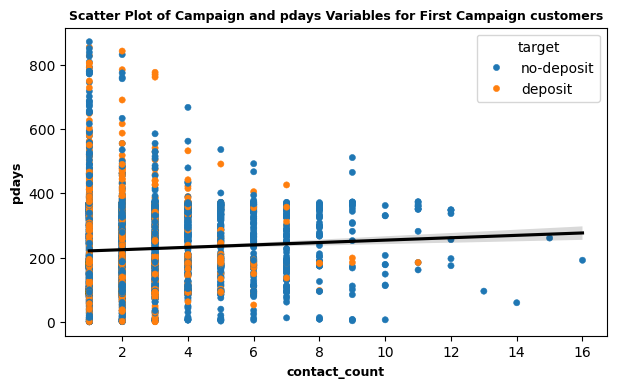

In [ ]:
data_FirstCampaign = data[data['pdays'] != -1]
plot_scatter(data_FirstCampaign, 'contact_count', 'pdays', hue='target', title='Scatter Plot of Campaign and pdays Variables for First Campaign customers')


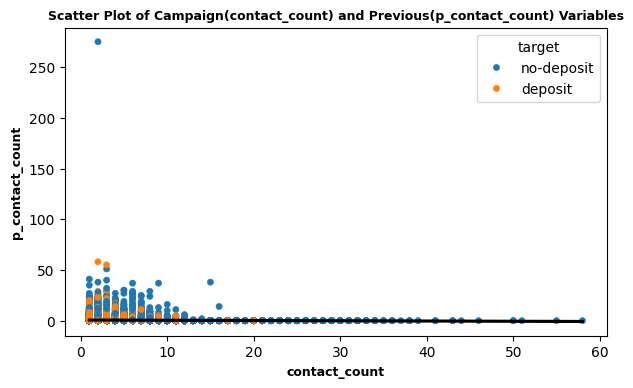

In [ ]:
plot_scatter(data, 'contact_count', 'p_contact_count', hue='target', title='Scatter Plot of Campaign(contact_count) and Previous(p_contact_count) Variables')

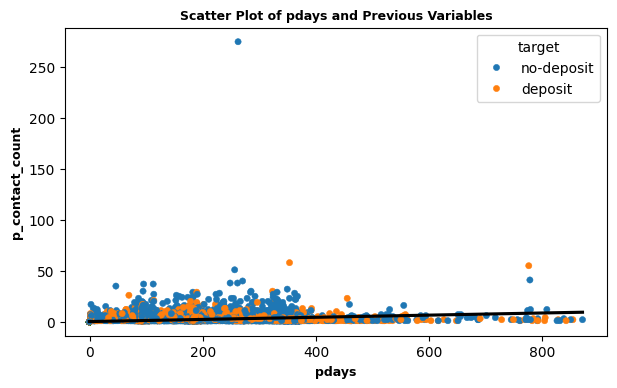

In [ ]:
plot_scatter(data, 'pdays', 'p_contact_count', hue='target', title='Scatter Plot of pdays and Previous Variables')

# **Box Plots and Bar plots Visualizations**

In [ ]:
def dist_box(data):
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

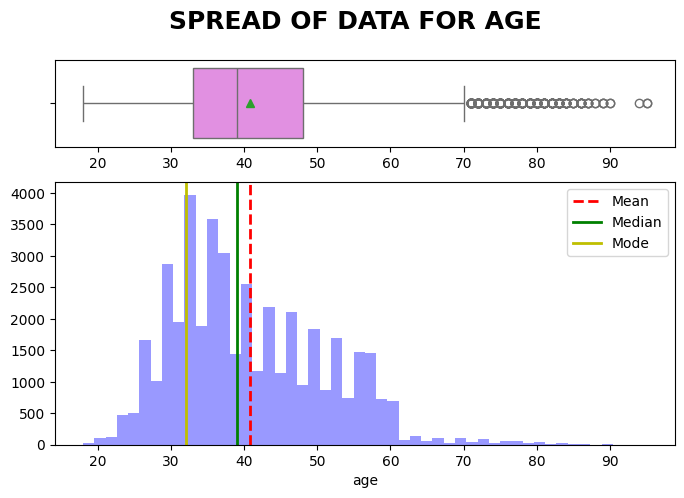

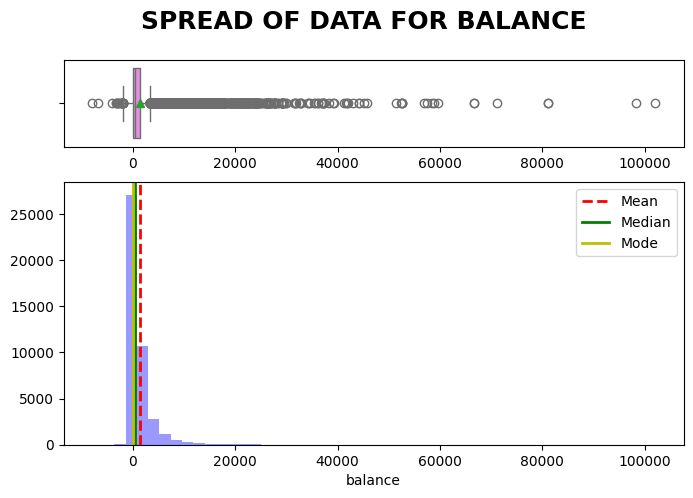

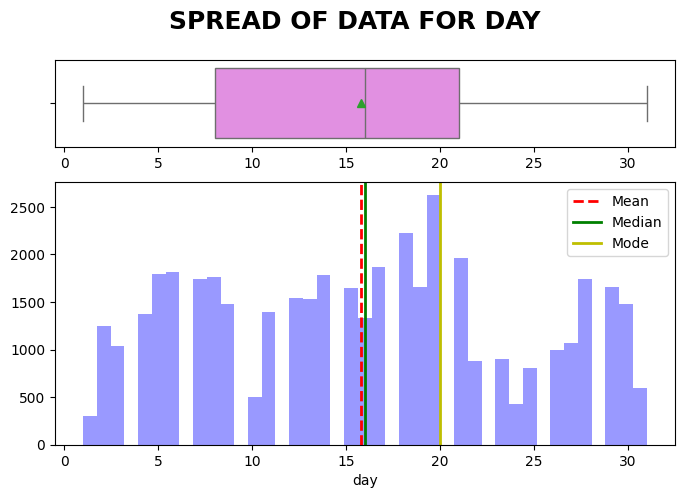

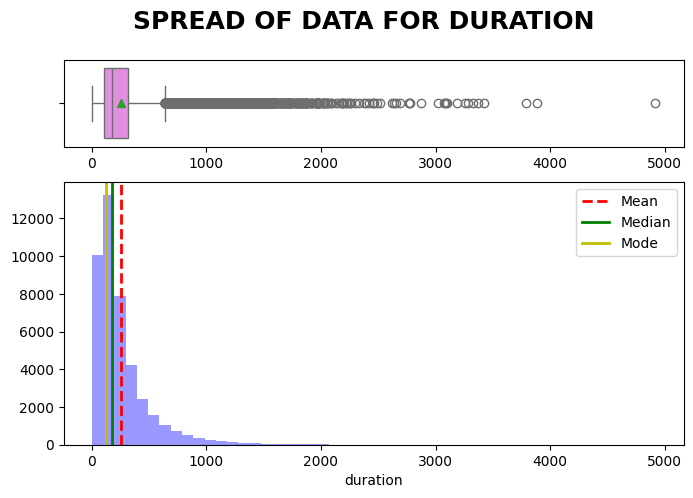

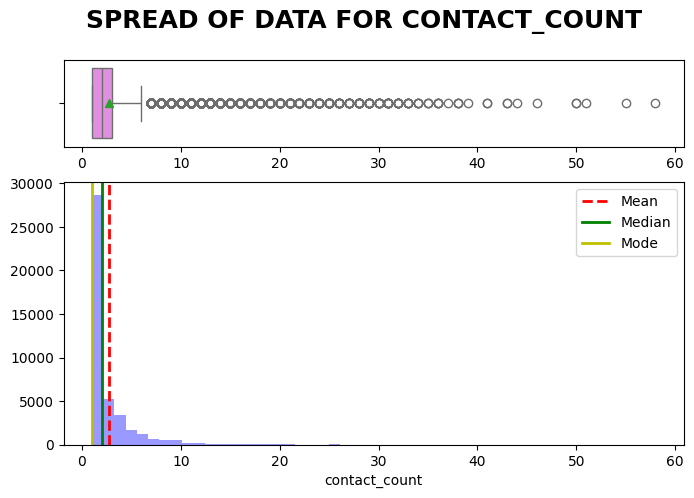

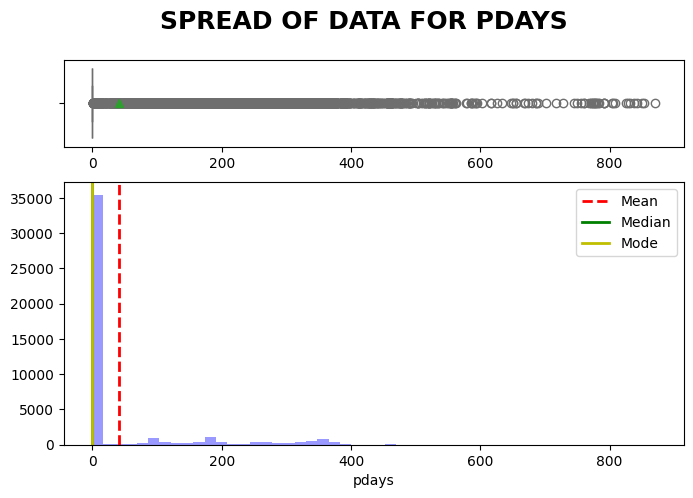

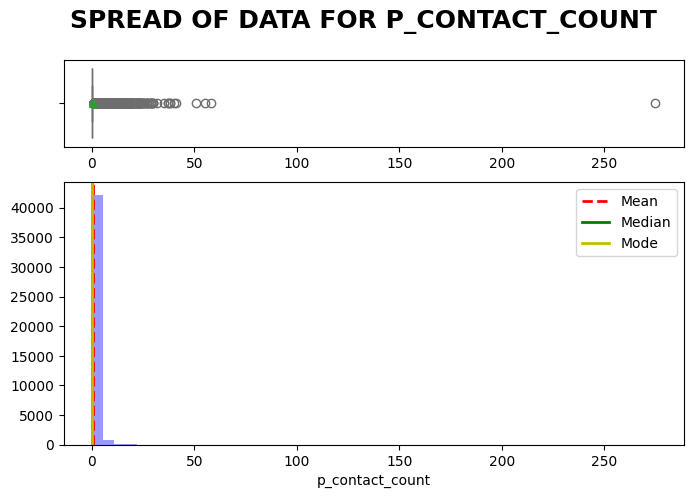

In [ ]:
list_col=  numerical_features #data.select_dtypes([np.number]).columns
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

# **Outliers Check**

In [ ]:
data.describe().T

count         mean          std     min    25%    50%  \
age              43193.0    40.764082    10.512640    18.0   33.0   39.0   
balance          43193.0  1354.027342  3042.103625 -8019.0   71.0  442.0   
day              43193.0    15.809414     8.305970     1.0    8.0   16.0   
duration         43193.0   258.323409   258.162006     0.0  103.0  180.0   
contact_count    43193.0     2.758178     3.063987     1.0    1.0    2.0   
pdays            43193.0    40.404070   100.420624    -1.0   -1.0   -1.0   
p_contact_count  43193.0     0.584863     2.332672     0.0    0.0    0.0   

                    75%       max  
age                48.0      95.0  
balance          1412.0  102127.0  
day                21.0      31.0  
duration          318.0    4918.0  
contact_count       3.0      58.0  
pdays              -1.0     871.0  
p_contact_count     0.0     275.0

In [ ]:
#Balance Outliers:

balance_data = data['balance']

Q1 = np.percentile(balance_data, 25)
Q3 = np.percentile(balance_data, 75)

print ("Q1=",Q1)
print ("Q3=",Q3)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("IQR=",IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

print("Min:",min(balance_data))
print("Max:",max(balance_data))


Q1= 71.0
Q3= 1412.0
IQR= 1341.0
Lower whisker: -1940.5
Upper whisker: 3423.5
Min: -8019
Max: 102127


In [ ]:
#contact_count Outliers:

contact_count_data = data['contact_count']

Q1 = np.percentile(contact_count_data, 25)
Q3 = np.percentile(contact_count_data, 75)

print ("Q1=",Q1)
print ("Q3=",Q3)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("IQR=",IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

print("Min:",min(contact_count_data))
print("Max:",max(contact_count_data))

Q1= 1.0
Q3= 3.0
IQR= 2.0
Lower whisker: -2.0
Upper whisker: 6.0
Min: 1
Max: 58


In [ ]:
##duration Outliers:
duration_data = data["duration"]

Q1 = np.percentile(duration_data, 25)
Q3 = np.percentile(duration_data, 75)

print ("Q1=",Q1)
print ("Q3=",Q3)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("IQR=",IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

print("Min:",min(duration_data))
print("Max:",max(duration_data))


Q1= 103.0
Q3= 318.0
IQR= 215.0
Lower whisker: -219.5
Upper whisker: 640.5
Min: 0
Max: 4918


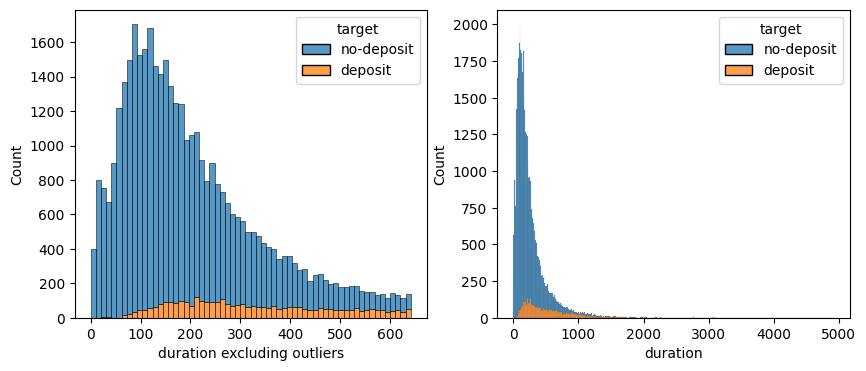

In [ ]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust( hspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=data[data['duration'] <= 641],x='duration', hue='target', multiple='stack')
plt.xlabel('duration excluding outliers')

plt.subplot(1,2,2)
sns.histplot(data=data,x='duration', hue='target', multiple='stack')
plt.xlabel('duration')
plt.show()


In [ ]:
##pdays Outliers:
pdays_data = data["pdays"]

Q1 = np.percentile(pdays_data, 25)
Q3 = np.percentile(pdays_data, 75)

print ("Q1=",Q1)
print ("Q3=",Q3)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("IQR=",IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

print("Min:",min(duration_data))
print("Max:",max(duration_data))

Q1= -1.0
Q3= -1.0
IQR= 0.0
Lower whisker: -1.0
Upper whisker: -1.0
Min: 0
Max: 4918


In [ ]:
#we need to eliminate pdays=-1 when checking outliers
##pdays Outliers:
pdays_data = data[data['pdays']!=-1]["pdays"]

Q1 = np.percentile(pdays_data, 25)
Q3 = np.percentile(pdays_data, 75)

print ("Q1=",Q1)
print ("Q3=",Q3)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

print("IQR=",IQR)
print("Lower whisker:", lower_whisker)
print("Upper whisker:", upper_whisker)

print("Min:",min(duration_data))
print("Max:",max(duration_data))

Q1= 133.0
Q3= 328.0
IQR= 195.0
Lower whisker: -159.5
Upper whisker: 620.5
Min: 0
Max: 4918


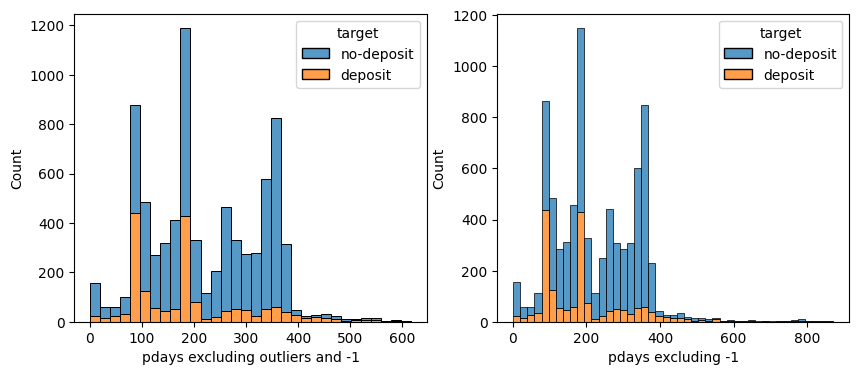

In [ ]:
#plots for pdays
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.subplots_adjust( hspace=0.5)

plt.subplot(1,2,1)
sns.histplot(data=data[(data['pdays'] <= 621) & (data['pdays'] !=-1) ],x='pdays', hue='target', multiple='stack')
plt.xlabel('pdays excluding outliers and -1')

plt.subplot(1,2,2)
sns.histplot(data=data[(data['pdays'] !=-1)],x='pdays', hue='target', multiple='stack')
plt.xlabel('pdays excluding -1')
plt.show()


# **Feature Scaling**

In [ ]:
#Feature Scaling
#we place features values between 0 and 1 or -1 and 1

In [ ]:
#Feature Scaling method 1: Normalization (we use min and max)values will be between 0 and 1
#Feature Scaling method 2: Standardization ( we use mean and standard deviation) values will be close to 0 and STD 1
#our outliers are impacting our values
#Feature Scaling method 3: Robust Scaler ( we will use Quartiles therefore more resistant to to outliers)

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# we scale numerical features

In [ ]:
print (numerical_features)

['age', 'balance', 'day', 'duration', 'contact_count', 'pdays', 'p_contact_count']


In [ ]:
columns_to_robust=numerical_features

In [ ]:
scaler_robust=RobustScaler()

In [ ]:
data.head(5)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   contact  day month  duration  contact_count  pdays  p_contact_count  \
0  unknown    5   may       261              1     -1                0   
1  unknown    5   may       151              1     -1                0   
2  unknown    5   may        76              1     -1                0   
5  unknown    5   may       139              1     -1                0   
6  unknown    5   may       217              1     -1                0   

  poutcome      target           pdays_group first_campaign  
0  unknown  no-deposit  No Previous Contacts              y  
1  unknown  no-deposit  No Previous Contacts              y  
2  unknown  no-deposit  No Previous Contacts              y  
5  unknown  no-deposit  No Previous Contacts              y  
6  unknown  no-deposit  No Previous Contacts              y

In [ ]:
data[columns_to_robust]=scaler_robust.fit_transform(data[columns_to_robust])

In [ ]:
data

age           job   marital  education default   balance housing  \
0      1.266667    management   married   tertiary      no  1.268456     yes   
1      0.333333    technician    single  secondary      no -0.307979     yes   
2     -0.400000  entrepreneur   married  secondary      no -0.328113     yes   
5     -0.266667    management   married   tertiary      no -0.157345     yes   
6     -0.733333    management    single   tertiary      no  0.003729     yes   
...         ...           ...       ...        ...     ...       ...     ...   
45206  0.800000    technician   married   tertiary      no  0.285608      no   
45207  2.133333       retired  divorced    primary      no  0.959732      no   
45208  2.200000       retired   married  secondary      no  3.932140      no   
45209  1.200000   blue-collar   married  secondary      no  0.168531      no   
45210 -0.133333  entrepreneur   married  secondary      no  1.885906      no   

      loan    contact       day month  duration  contact_count  pdays  \
0       no    unknown -0.846154   may  0.376744           -0.5    0.0   
1       no    unknown -0.846154   may -0.134884           -0.5    0.0   
2      yes    unknown -0.846154   may -0.483721           -0.5    0.0   
5       no    unknown -0.846154   may -0.190698           -0.5    0.0   
6      yes    unknown -0.846154   may  0.172093           -0.5    0.0   
...    ...        ...       ...   ...       ...            ...    ...   
45206   no   cellular  0.076923   nov  3.706977            0.5    0.0   
45207   no   cellular  0.076923   nov  1.283721            0.0    0.0   
45208   no   cellular  0.076923   nov  4.404651            1.5  185.0   
45209   no  telephone  0.076923   nov  1.525581            1.0    0.0   
45210   no   cellular  0.076923   nov  0.841860            0.0  189.0   

       p_contact_count poutcome      target           pdays_group  \
0                  0.0  unknown  no-deposit  No Previous Contacts   
1                  0.0  unknown  no-deposit  No Previous Contacts   
2                  0.0  unknown  no-deposit  No Previous Contacts   
5                  0.0  unknown  no-deposit  No Previous Contacts   
6                  0.0  unknown  no-deposit  No Previous Contacts   
...                ...      ...         ...                   ...   
45206              0.0  unknown     deposit  No Previous Contacts   
45207              0.0  unknown     deposit  No Previous Contacts   
45208              3.0  success     deposit          182-273 Days   
45209              0.0  unknown  no-deposit  No Previous Contacts   
45210             11.0    other  no-deposit          182-273 Days   

      first_campaign  
0                  y  
1                  y  
2                  y  
5                  y  
6                  y  
...              ...  
45206              y  
45207              y  
45208              n  
45209              y  
45210              n  

[43193 rows x 19 columns]

In [ ]:
data.describe().T

count       mean         std       min       25%  50%  \
age              43193.0   0.117605    0.700843 -1.400000 -0.400000  0.0   
balance          43193.0   0.680110    2.268534 -6.309471 -0.276659  0.0   
day              43193.0  -0.014660    0.638921 -1.153846 -0.615385  0.0   
duration         43193.0   0.364295    1.200754 -0.837209 -0.358140  0.0   
contact_count    43193.0   0.379089    1.531993 -0.500000 -0.500000  0.0   
pdays            43193.0  41.404070  100.420624  0.000000  0.000000  0.0   
p_contact_count  43193.0   0.584863    2.332672  0.000000  0.000000  0.0   

                      75%         max  
age              0.600000    3.733333  
balance          0.723341   75.827740  
day              0.384615    1.153846  
duration         0.641860   22.037209  
contact_count    0.500000   28.000000  
pdays            0.000000  872.000000  
p_contact_count  0.000000  275.000000

In [ ]:
#now we standardize numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
columns_to_standard=numerical_features

In [ ]:
scaler_standard=StandardScaler()

In [ ]:
data.head(5)

age           job  marital  education default   balance housing loan  \
0  1.266667    management  married   tertiary      no  1.268456     yes   no   
1  0.333333    technician   single  secondary      no -0.307979     yes   no   
2 -0.400000  entrepreneur  married  secondary      no -0.328113     yes  yes   
5 -0.266667    management  married   tertiary      no -0.157345     yes   no   
6 -0.733333    management   single   tertiary      no  0.003729     yes  yes   

   contact       day month  duration  contact_count  pdays  p_contact_count  \
0  unknown -0.846154   may  0.376744           -0.5    0.0              0.0   
1  unknown -0.846154   may -0.134884           -0.5    0.0              0.0   
2  unknown -0.846154   may -0.483721           -0.5    0.0              0.0   
5  unknown -0.846154   may -0.190698           -0.5    0.0              0.0   
6  unknown -0.846154   may  0.172093           -0.5    0.0              0.0   

  poutcome      target           pdays_group first_campaign  
0  unknown  no-deposit  No Previous Contacts              y  
1  unknown  no-deposit  No Previous Contacts              y  
2  unknown  no-deposit  No Previous Contacts              y  
5  unknown  no-deposit  No Previous Contacts              y  
6  unknown  no-deposit  No Previous Contacts              y

In [ ]:
data[columns_to_standard]=scaler_standard.fit_transform(data[columns_to_standard])

In [ ]:
data

age           job   marital  education default   balance housing  \
0      1.639561    management   married   tertiary      no  0.259354     yes   
1      0.307816    technician    single  secondary      no -0.435568     yes   
2     -0.738556  entrepreneur   married  secondary      no -0.444443     yes   
5     -0.548306    management   married   tertiary      no -0.369166     yes   
6     -1.214179    management    single   tertiary      no -0.298161     yes   
...         ...           ...       ...        ...     ...       ...     ...   
45206  0.973688    technician   married   tertiary      no -0.173904      no   
45207  2.876182       retired  divorced    primary      no  0.123262      no   
45208  2.971307       retired   married  secondary      no  1.433555      no   
45209  1.544437   blue-collar   married  secondary      no -0.225513      no   
45210 -0.358057  entrepreneur   married  secondary      no  0.531537      no   

      loan    contact       day month  duration  contact_count     pdays  \
0       no    unknown -1.301418   may  0.010368      -0.573827 -0.412311   
1       no    unknown -1.301418   may -0.415726      -0.573827 -0.412311   
2      yes    unknown -1.301418   may -0.706245      -0.573827 -0.412311   
5       no    unknown -1.301418   may -0.462209      -0.573827 -0.412311   
6      yes    unknown -1.301418   may -0.160070      -0.573827 -0.412311   
...    ...        ...       ...   ...       ...            ...       ...   
45206   no   cellular  0.143343   nov  2.783852       0.078925 -0.412311   
45207   no   cellular  0.143343   nov  0.765716      -0.247451 -0.412311   
45208   no   cellular  0.143343   nov  3.364890       0.731677  1.429961   
45209   no  telephone  0.143343   nov  0.967143       0.405301 -0.412311   
45210   no   cellular  0.143343   nov  0.397726      -0.247451  1.469794   

       p_contact_count poutcome      target           pdays_group  \
0            -0.250730  unknown  no-deposit  No Previous Contacts   
1            -0.250730  unknown  no-deposit  No Previous Contacts   
2            -0.250730  unknown  no-deposit  No Previous Contacts   
5            -0.250730  unknown  no-deposit  No Previous Contacts   
6            -0.250730  unknown  no-deposit  No Previous Contacts   
...                ...      ...         ...                   ...   
45206        -0.250730  unknown     deposit  No Previous Contacts   
45207        -0.250730  unknown     deposit  No Previous Contacts   
45208         1.035364  success     deposit          182-273 Days   
45209        -0.250730  unknown  no-deposit  No Previous Contacts   
45210         4.464947    other  no-deposit          182-273 Days   

      first_campaign  
0                  y  
1                  y  
2                  y  
5                  y  
6                  y  
...              ...  
45206              y  
45207              y  
45208              n  
45209              y  
45210              n  

[43193 rows x 19 columns]

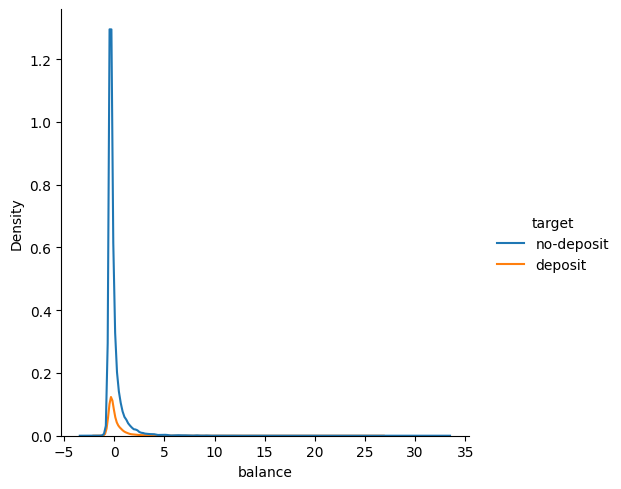

In [ ]:
sns.displot(data=data, x='balance', hue='target', kind='kde')

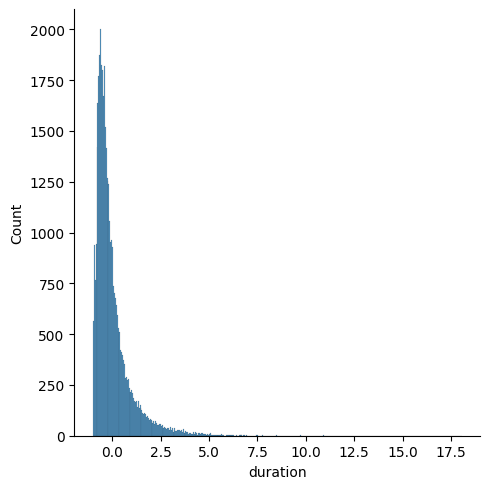

In [ ]:
sns.displot(data['duration'])

In [ ]:
from scipy.stats import norm

In [ ]:
#sns.displot(data['duration'], fit = norm)

<Axes: xlabel='duration', ylabel='Density'>

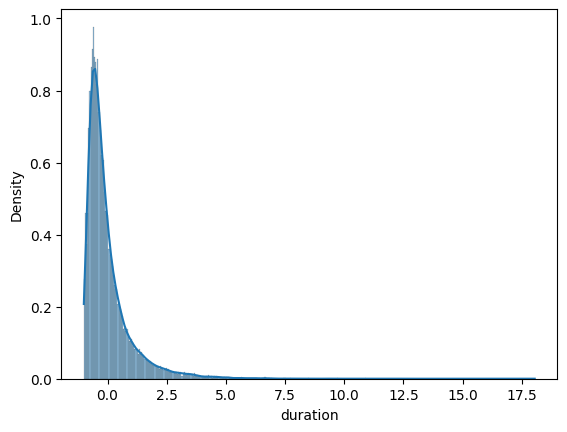

In [ ]:
sns.histplot(data['duration'], kde=True, stat='density')

# **Corralation**

In [ ]:
# Corraltions

In [ ]:
#Types of correlation
#1: on the basis of degree of correlation (between -1 and 1, closer to 0 means less correlation)
    #-0.1 to 0.1 no correlation, 0.5 to 1 and -0.5 to -1 strong correlation
    #positive
    #negative
    #no correlation
#2:on the basis of number of variables
    #simple
    #partial
    #multiple
#3:on the basis of linearity
    #linear
    #non-linear


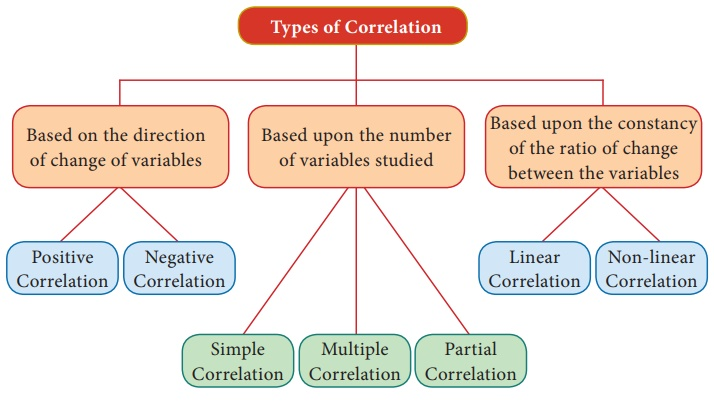

In [ ]:
#Changing our target to int
data['target'].replace({'no-deposit': 0, 'deposit': 1}, inplace=True)
data.target.value_counts()

target
0    38172
1     5021
Name: count, dtype: int64

In [ ]:
#Correlation Matrix to view correlations of numerical features

numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
correlation_matrix

age   balance       day  duration  contact_count  \
age              1.000000  0.097602 -0.008451 -0.004953       0.004050   
balance          0.097602  1.000000  0.004118  0.020051      -0.016251   
day             -0.008451  0.004118  1.000000 -0.030074       0.164982   
duration        -0.004953  0.020051 -0.030074  1.000000      -0.083118   
contact_count    0.004050 -0.016251  0.164982 -0.083118       1.000000   
pdays           -0.023248  0.003928 -0.094343 -0.002403      -0.088920   
p_contact_count  0.001099  0.016564 -0.052053  0.000295      -0.032381   
target           0.024760  0.051386 -0.030247  0.397393      -0.072465   

                    pdays  p_contact_count    target  
age             -0.023248         0.001099  0.024760  
balance          0.003928         0.016564  0.051386  
day             -0.094343        -0.052053 -0.030247  
duration        -0.002403         0.000295  0.397393  
contact_count   -0.088920        -0.032381 -0.072465  
pdays            1.000000         0.452953  0.101446  
p_contact_count  0.452953         1.000000  0.091764  
target           0.101446         0.091764  1.000000

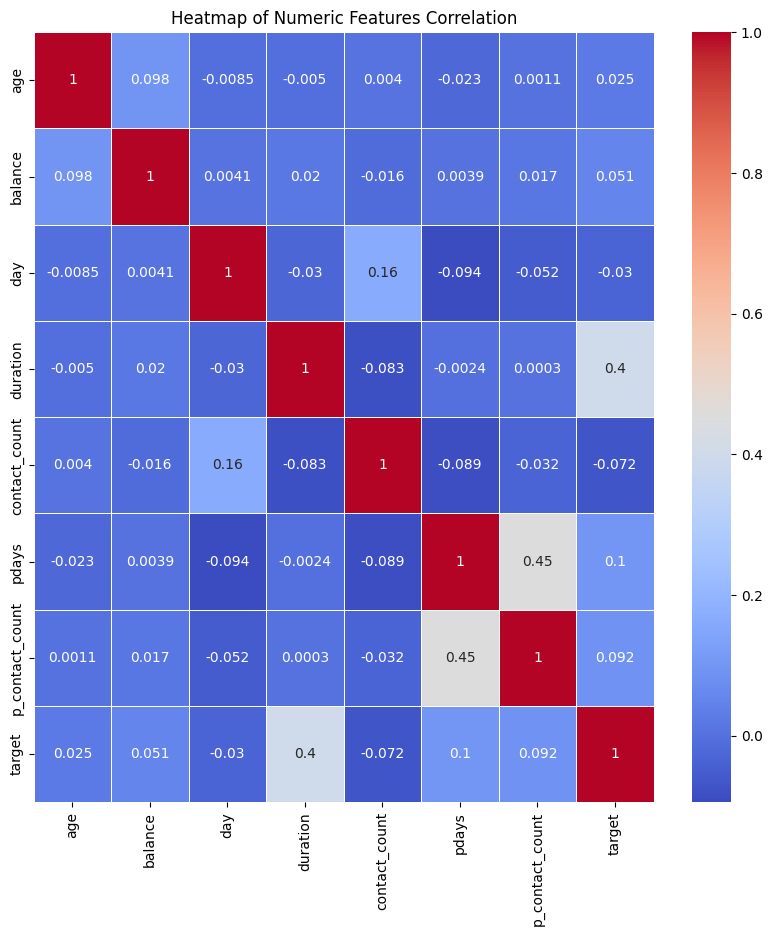

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

In [ ]:
#when testing corretion of numerical and categorical we use Pearson
#If we got a low number then we use Spearman
#in Pearson non linear correlation doesn't show well , Spearman shows non-linear

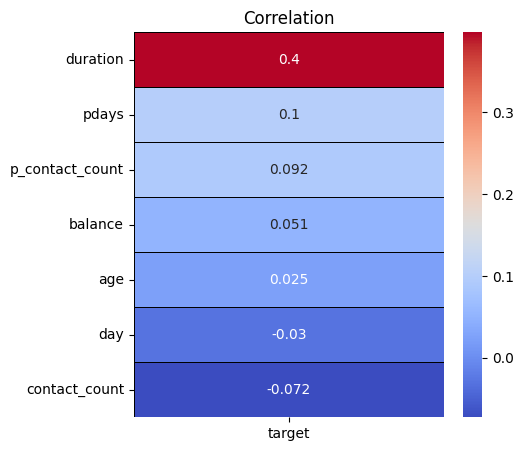

In [ ]:
plt.figure(figsize=(5,5))
#Pearson, when method is not mentioned default is Pearson
corr = data[numerical_features].corrwith(data['target']).sort_values(ascending = False).to_frame()
corr.columns = ['target']
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation')
plt.show()


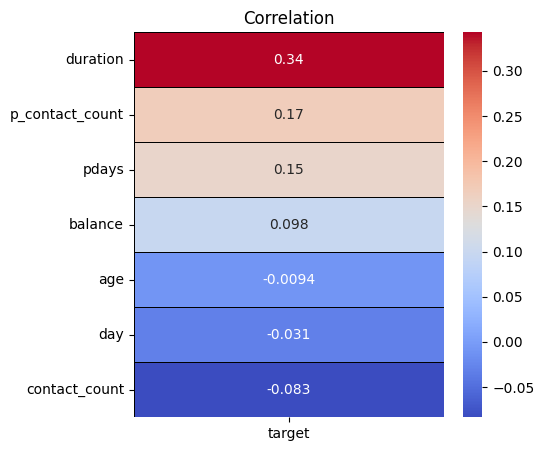

In [ ]:
plt.figure(figsize=(5,5))
#method : spearman
corr = data[numerical_features].corrwith(data['target'], method='spearman').sort_values(ascending = False).to_frame()
corr.columns = ['target']
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation')
plt.show()

In [ ]:
#Therefore for numerical features we keep duration, pdays, p_contact_count (previous)

In [ ]:
#testing categorical values we use chai-square (chi2) but to get the number we use Cramers

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

#put categorical features in df called data_cat
data_cat = data[categorical_features]

#This is defined function for cramers using chi2
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

target = data_cat['target']
cramer_vs = {}
for column in list(data_cat.columns):
    cramer_v = cramers_v(data_cat[column], target)
    cramer_vs[column] = cramer_v

for column, cramer_v in cramer_vs.items():
    print(f"Cramer's V for '{column}': {cramer_v:.2f}")

Cramer's V for 'job': 0.13
Cramer's V for 'marital': 0.07
Cramer's V for 'education': 0.07
Cramer's V for 'default': 0.02
Cramer's V for 'housing': 0.14
Cramer's V for 'loan': 0.07
Cramer's V for 'contact': 0.15
Cramer's V for 'month': 0.26
Cramer's V for 'poutcome': 0.31
Cramer's V for 'target': 1.00
Cramer's V for 'pdays_group': 0.20
Cramer's V for 'first_campaign': 0.16


In [ ]:
#Note: we defined 2 new categorical features pdays_group and first_campaign, both of them show a good correlation

In [ ]:
#First we check without new features

In [ ]:
final_data = data[['job', 'housing', 'contact', 'poutcome', 'month', 'target', 'duration', 'p_contact_count', 'pdays']]

In [ ]:
# export final data to csv
#from google.colab import files
#final_data.to_csv('final_data.csv', index=False)
#files.download('final_data.csv')


In [ ]:
#This data also includes 2 extra categorical features: first_campiagn and pdays_group
final_data_2=data[['first_campaign','pdays_group','job', 'housing', 'contact', 'poutcome', 'month', 'target', 'duration', 'p_contact_count', 'pdays']]

In [ ]:
#export final_data_2 to csv
#from google.colab import files#
#final_data.to_csv('final_data_2.csv', index=False)
#files.download('final_data_2.csv')

# **Preprocessing**

In [ ]:
#now we have to change our data from categorical to int so we can start modeling

In [ ]:
#we are not using get_dummies for this project because for each state of each category there will be a new column and that means we have too many columns which could results into overfitting our model

In [ ]:
#final_data = pd.get_dummies(final_data, columns=['job', 'marital', 'education', 'default','housing', 'loan','contact', 'month'])

In [ ]:
#Using LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

for column in final_data.select_dtypes(include=['object']):
    final_data[column] = encoder.fit_transform(final_data[column])

In [ ]:
#Check types have changed
final_data.dtypes

job                  int64
housing              int64
contact              int64
poutcome             int64
month                int64
target               int64
duration           float64
p_contact_count    float64
pdays              float64
dtype: object

In [ ]:
final_data

job  housing  contact  poutcome  month  target  duration  \
0        4        1        2         3      8       0  0.010368   
1        9        1        2         3      8       0 -0.415726   
2        2        1        2         3      8       0 -0.706245   
5        4        1        2         3      8       0 -0.462209   
6        4        1        2         3      8       0 -0.160070   
...    ...      ...      ...       ...    ...     ...       ...   
45206    9        0        0         3      9       1  2.783852   
45207    5        0        0         3      9       1  0.765716   
45208    5        0        0         2      9       1  3.364890   
45209    1        0        1         3      9       0  0.967143   
45210    2        0        0         1      9       0  0.397726   

       p_contact_count     pdays  
0            -0.250730 -0.412311  
1            -0.250730 -0.412311  
2            -0.250730 -0.412311  
5            -0.250730 -0.412311  
6            -0.250730 -0.412311  
...                ...       ...  
45206        -0.250730 -0.412311  
45207        -0.250730 -0.412311  
45208         1.035364  1.429961  
45209        -0.250730 -0.412311  
45210         4.464947  1.469794  

[43193 rows x 9 columns]

# **Balancing Data**

In [ ]:
#let's work on imbalanced data
final_data['target'].value_counts()


target
0    38172
1     5021
Name: count, dtype: int64

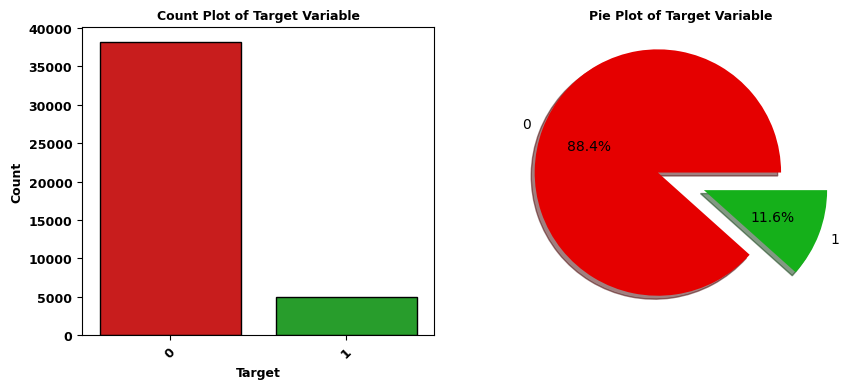

In [ ]:
fig = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
colors_RGY =['#e50000','#15b01a','#ffff14']

plt.subplot(1, 2, 1)
sns.countplot(x='target', data=final_data, palette=colors_RGY, edgecolor='black' ,width=0.8)


plt.title('Count Plot of Target Variable', fontsize=9, fontweight='bold')
plt.xticks(rotation=45, fontsize=9, fontweight='bold')
plt.yticks(fontsize=9, fontweight='bold')
plt.ylabel('Count', fontsize=9, fontweight='bold')
plt.xlabel('Target', fontsize=9, fontweight='bold')


plt.subplot(1, 2, 2)
l = data['target'].value_counts()
pie_plot = l.plot.pie(autopct='%1.1f%%', shadow=True, colors=colors_RGY, explode=[0.2, 0.2])
pie_plot.set_ylabel('')
plt.title('Pie Plot of Target Variable', fontsize=9, fontweight='bold')

plt.show()

In [ ]:
#imblearn library is one of the libraries we use for balancing

In [ ]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
over = SMOTE(sampling_strategy = 0.9)
under = RandomUnderSampler(sampling_strategy = 0.3)
f1 = final_data.drop(columns=['target'])#all data except target
t1 = final_data['target']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 16736, 1: 15062})

In [ ]:
#balancing target, sampling strategy .9 and sampling strategy 0.3

Text(0.5, 1.0, 'Distribution of Target Variable')

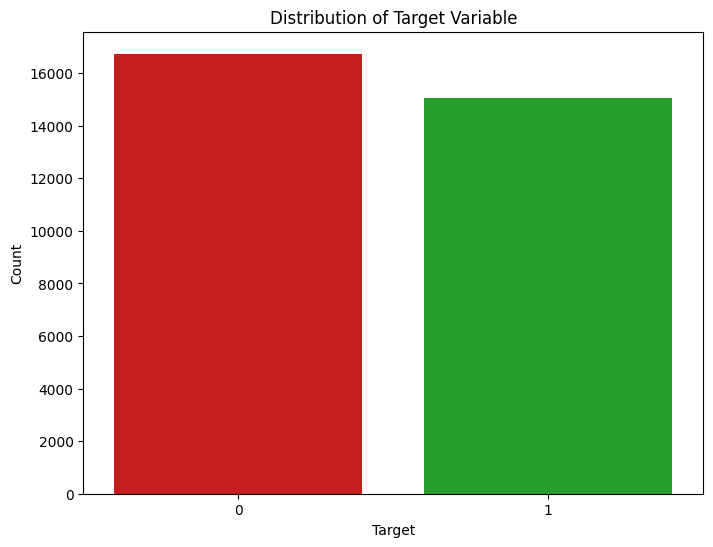

In [ ]:
from collections import Counter
import pandas as pd

# Sample Counter object
counter = Counter(t1)

# Convert Counter to DataFrame
df = pd.DataFrame(counter.items(), columns=['target', 'count'])


plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.barplot(x='target', y='count', data=df, palette=colors_RGY)  # Use barplot for this DataFrame structure

# Add labels and title
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')

In [ ]:
final_data['target'].value_counts()

target
0    38172
1     5021
Name: count, dtype: int64

In [ ]:
f1.shape #balanced features

(31798, 8)

In [ ]:
t1.shape #balanced target

(31798,)

In [ ]:
f1.head(5)

job  housing  contact  poutcome  month  duration  p_contact_count     pdays
0    1        0        1         3      5 -0.376990        -0.250730 -0.412311
1    4        0        0         3      3  1.094971        -0.250730 -0.412311
2    6        1        2         3      8  0.397726        -0.250730 -0.412311
3    0        1        0         0      8 -0.559048         3.178853  2.455659
4    4        1        0         1      3  3.330027         0.177968 -0.322687

In [ ]:
t1.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
t1.value_counts()

target
0    16736
1    15062
Name: count, dtype: int64

# **Modeling Data**

## **Test and Train data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)#f1 is x and t1 is y

In [ ]:
print(x_train.shape, x_test.shape)

(22258, 8) (9540, 8)


In [ ]:
#pip install xgboost

## **Import Classifiers and Metrics**

In [ ]:
# necessary classifiers for building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score

## **Functions for Modeling**

In [ ]:
#this function perform grid search and gives best parameter and a score
def perform_grid_search_with_best_score(model, param_grid, X_train, y_train, X_test, y_test):

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')#cv=5 means divide the data (train)to 5 and train on 4 them test on 5th
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_ #gives best model
    best_params = grid_search.best_params_  #gives best parameter

    y_pred = best_model.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)

    return best_params, test_score
    #we just want to get a score for now


In [ ]:
#this function evaluates our model
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))


In [ ]:
#this function illustrates roc_curve
def plot_roc_curve(y_true, y_scores):#y_score is what model gives andt-true is real y
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)#y_score is what model gives andt-true is real y

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# **Logistic Regression Model**

In [ ]:
#Logistic Regression Model

In [ ]:
#Logistioc Regression is a good model for Binary Classification
#In LogisticRegression first a liner model is identified among independent variables(features) then logistic function is performed
#result is between 0 and 1
#>0.5 class 1
#<0.5 class 0
#=0.5 class 1 (usually)


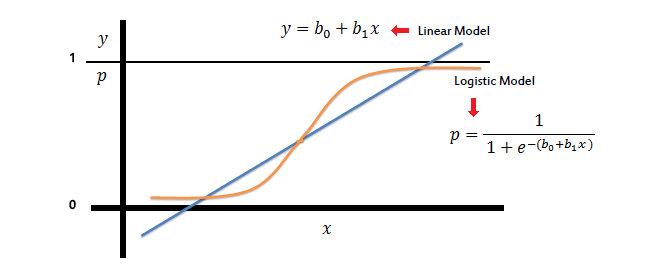

In [ ]:
#max-iter means maximum number of tries (alogorthym repeats to find best answer) to find the best param, default is 100
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0], #prevents over_fitting
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(logreg, param_grid, x_train, y_train, x_test, y_test)

# Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Test Score (Accuracy): 0.7952830188679245


In [ ]:
#Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
#Test Score (Accuracy): 0.7942348008385745

In [ ]:
#now we use the parameters that we got  in our logistic regression model
logreg = LogisticRegression(max_iter=1000, C = 0.1, penalty = 'l1', solver = 'liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
y_pred = logreg.predict(x_test)

In [ ]:
y_pred.shape

(9540,)

In [ ]:
# create a data frame with:y_test and y_pred from above
LogReg_Y_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(LogReg_Y_df)


       Actual  Predicted
7654        0          0
30806       1          1
11946       0          1
29733       1          0
14848       0          0
...       ...        ...
19306       1          1
7701        0          1
11057       0          1
24454       1          0
28025       1          1

[9540 rows x 2 columns]


In [ ]:
# download LogReg_Y_df to csv file
#from google.colab import files
#LogReg_Y_df.to_csv('logreg_predictions.csv', index=True)
#files.download('logreg_predictions.csv')

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4970
           1       0.81      0.76      0.78      4570

    accuracy                           0.80      9540
   macro avg       0.80      0.79      0.79      9540
weighted avg       0.80      0.80      0.80      9540



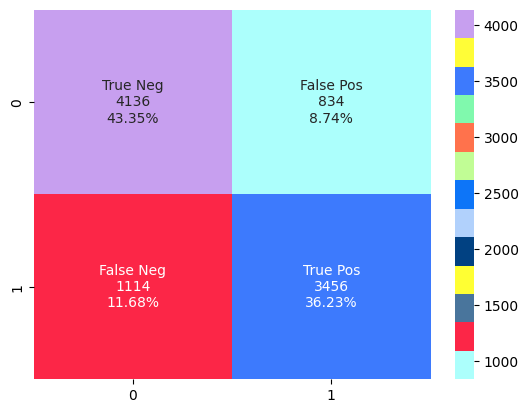

In [ ]:
#now we have to evaluate
model_evaluation(logreg, x_test, y_test)

In [ ]:
#Logistic Regression
#              precision    recall  f1-score   support
#
#           0       0.78      0.83      0.81      4970
#           1       0.81      0.75      0.78      4570
#
#    accuracy                           0.79      9540
#   macro avg       0.80      0.79      0.79      9540
#weighted avg       0.79      0.79      0.79      9540

## **Logistic Regression Overall Scores**

In [ ]:
LogReg_f1_score = 0.79
LogReg_accuracy = 0.79
LogReg_precision = 0.79
LogReg_recall = 0.79

In [ ]:
#True: Prediction was Correct
#False Positive: the reality was neg but our model predicted as positive
# This means in 8.64% of cases, client didn't open a term deposit but our model predicted that  they will
#False Negative: the reality was  positive but the model predicted it as negative
#This means our model predicted that 11.94% won't open deposit account while in reality they did


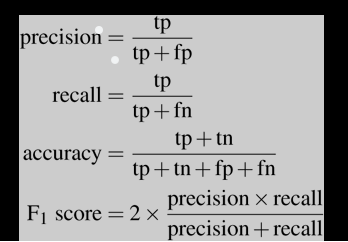

In [ ]:
#precision: shows how good our model predicted the results
#since we balance  our data we have close precesion for 0 and 1, if we hadn't balance our data we would have big difference

#recall:(also known as sensitivity) is the fraction of relevant instances that were retrieved.attempts to answer the following question:
#What proportion of actual positives was identified correctly

#f1_score:is a measure of the harmonic mean of precision and recall.
#accuracy:Overall accuracy of our model

In [ ]:
#Illustrating Roc Curve Plot

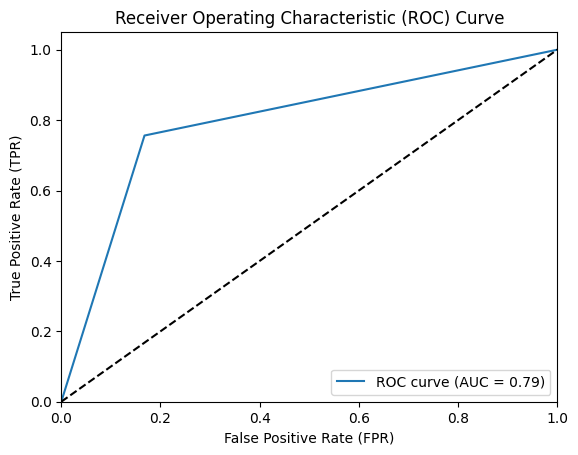

In [ ]:
logreg_prediction = logreg.predict(x_test)
plot_roc_curve(y_test, logreg_prediction)

In [ ]:
LogReg_Y_df

Actual  Predicted
7654        0          0
30806       1          1
11946       0          1
29733       1          0
14848       0          0
...       ...        ...
19306       1          1
7701        0          1
11057       0          1
24454       1          0
28025       1          1

[9540 rows x 2 columns]

In [ ]:
LogReg_Y_df['correct'] = np.where(LogReg_Y_df['Actual'] == LogReg_Y_df['Predicted'], 'y', 'n')

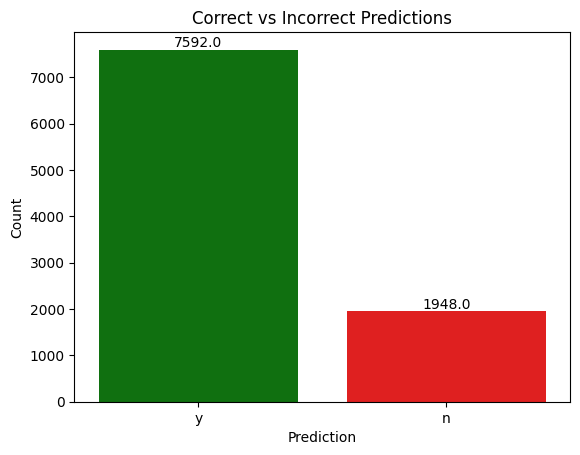

In [ ]:
# plot for count of correct predictions vs incorrect
sns.countplot(x='correct', data=LogReg_Y_df, palette=['green', 'red'])
plt.title('Correct vs Incorrect Predictions')
plt.xlabel('Prediction')
plt.ylabel('Count')

# Add count labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.show()

# **KNN**

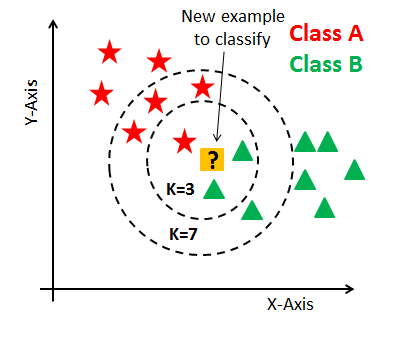

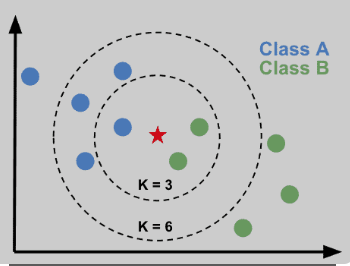

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)#f1 is x and t1 is y

In [ ]:
#if K is too small model will overfit and if too big our accuracy might be low
#in this example if k=3 then star will be class B , when k=6 it will be class A

In [ ]:
# Define the KNN model
knn = KNeighborsClassifier()

#if n is too small our model will be overfit, if too small we have low accuracy
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],#want to test with different n
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Perform grid search and get the best parameters and test score
best_params, test_score = perform_grid_search_with_best_score(knn, param_grid, x_train, y_train, x_test, y_test)

# Print the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Test Score (Accuracy): 0.8617400419287212


In [ ]:
#Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
#Test Score (Accuracy): 0.8617400419287212

In [ ]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 9, p = 1, weights = 'distance')
knn.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      4970
           1       0.83      0.89      0.86      4570

    accuracy                           0.86      9540
   macro avg       0.86      0.86      0.86      9540
weighted avg       0.86      0.86      0.86      9540



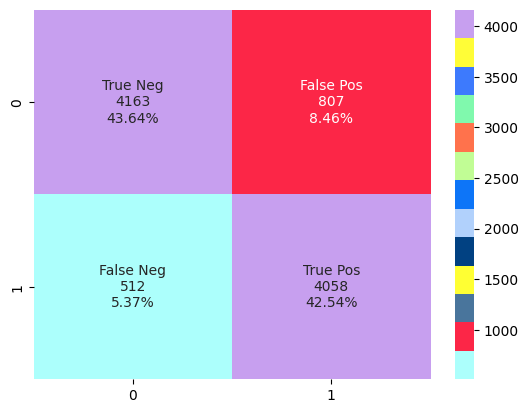

In [ ]:
model_evaluation(knn, x_test, y_test)

In [ ]:
#KNN
#              precision    recall  f1-score   support
#
#           0       0.89      0.83      0.86      4970
#           1       0.83      0.89      0.86      4570
#
#    accuracy                           0.86      9540
#   macro avg       0.86      0.86      0.86      9540
#weighted avg       0.86      0.86      0.86      9540

## **KNN Overall Scores**

In [ ]:
knn_f1_score = 0.86
knn_accuracy = 0.86
knn_precision = 0.86
knn_recall = 0.86

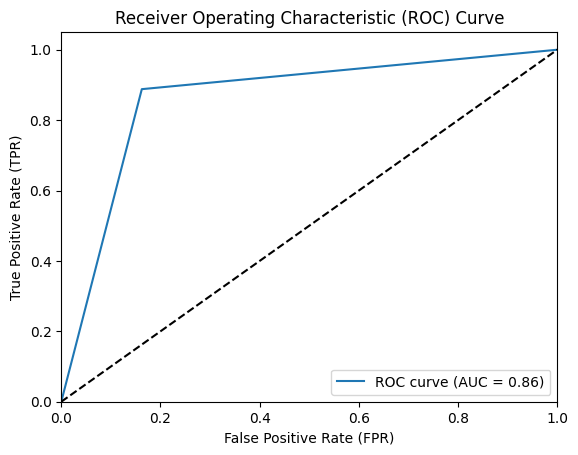

In [ ]:
knn_prediction = knn.predict(x_test)
plot_roc_curve(y_test, knn_prediction)

In [ ]:
#KNN AUC=0.86

# **Random Forest**

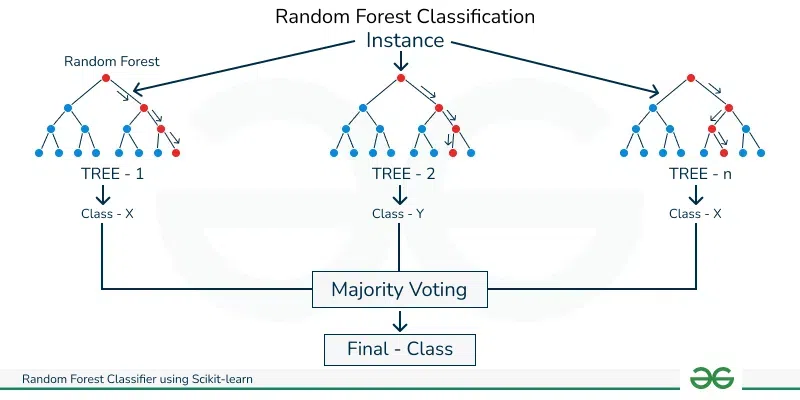

In [ ]:
RF = RandomForestClassifier(random_state=101)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size=0.3, random_state=101)#f1 is x and t1 is y

In [ ]:
    # Define the parameter grid
param_grid = {
        'n_estimators': [50, 100, 200],#number of trees
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(RF, param_grid, x_train, y_train, x_test, y_test)

    # Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Score (Accuracy): 0.8736897274633124


In [ ]:
RF = RandomForestClassifier(random_state=101, max_depth = 20, min_samples_leaf = 2,
                                 min_samples_split = 10, n_estimators = 50)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=101)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      4970
           1       0.85      0.90      0.87      4570

    accuracy                           0.87      9540
   macro avg       0.87      0.87      0.87      9540
weighted avg       0.87      0.87      0.87      9540



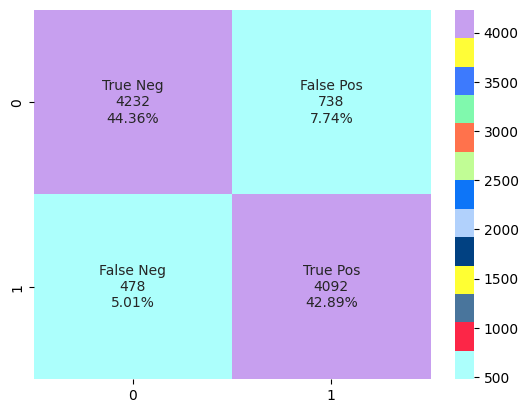

In [ ]:
model_evaluation(RF, x_test, y_test)

In [ ]:
# Random Forest
#      precision    recall  f1-score   support
#
#           0       0.89      0.85      0.87      4970
#           1       0.84      0.89      0.87      4570
#
#    accuracy                           0.87      9540
#   macro avg       0.87      0.87      0.87      9540
#weighted avg       0.87      0.87      0.87      9540
#

## **RF Overall Scores**

In [ ]:
RF_f1_score = 0.87
RF_accuracy = 0.87
RF_precision = 0.87
RF_recall = 0.87

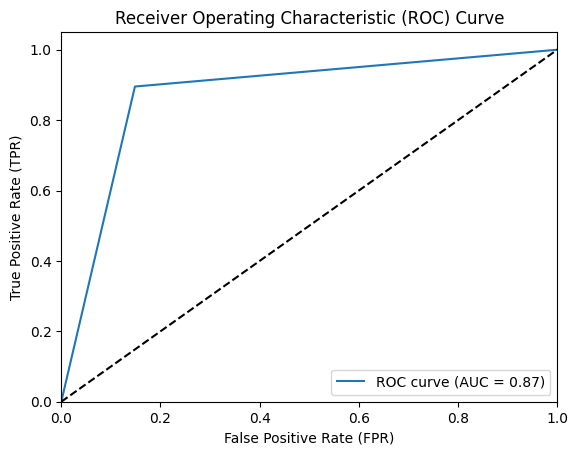

In [ ]:
RF_prediction = RF.predict(x_test)
plot_roc_curve(y_test, RF_prediction)

In [ ]:
#RF AUC=0.87

# **Gradient Boosting Classifier (GBC)**

In [ ]:
#First gets the data and models it (weak classfying) then gets the prediction and models it, countinues....
#prediction of each modeling makes final classification

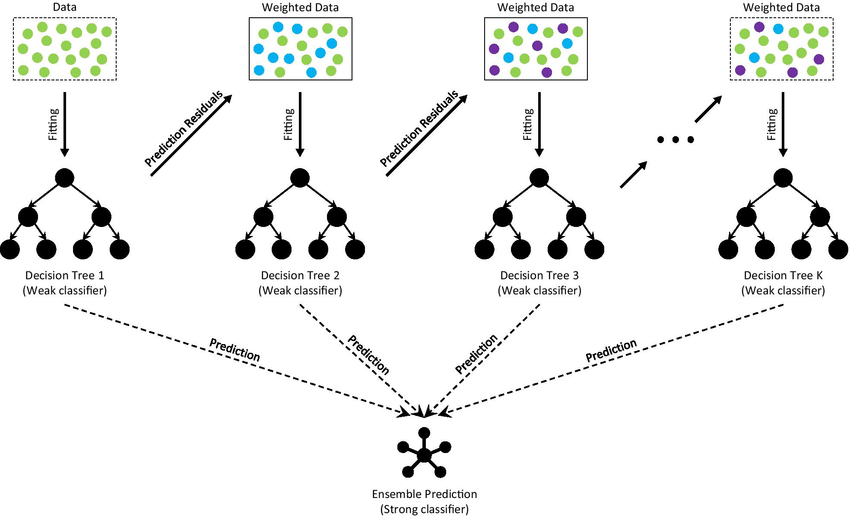

In [ ]:
GBC = GradientBoostingClassifier()

    # Define the parameter grid
param_grid = {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(GBC, param_grid, x_train, y_train, x_test, y_test)

    # Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Score (Accuracy): 0.8576519916142558


In [ ]:
#Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
#Test Score (Accuracy): 0.8576519916142558

In [ ]:
GBC = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)
GBC.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, min_samples_split=5)

In [ ]:
#GradientBoostingClassifier
#GradientBoostingClassifier(max_depth=4, min_samples_split=5)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      4970
           1       0.84      0.87      0.86      4570

    accuracy                           0.86      9540
   macro avg       0.86      0.86      0.86      9540
weighted avg       0.86      0.86      0.86      9540



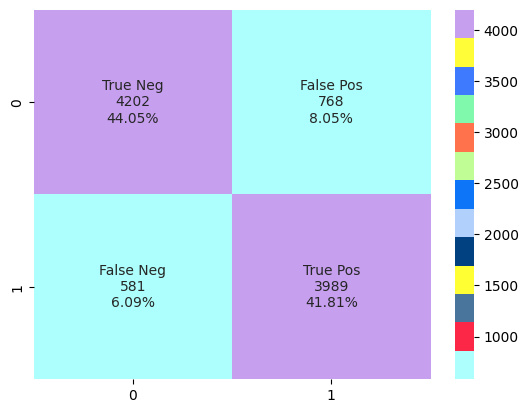

In [ ]:
model_evaluation(GBC, x_test, y_test)

In [ ]:
#GBC
#                precision  recall     f1-score   support

#
#           0       0.88      0.85      0.86      4970
#           1       0.84      0.87      0.86      4570
#
#    accuracy                           0.86      9540
#   macro avg       0.86      0.86      0.86      9540
#weighted avg       0.86      0.86      0.86      9540

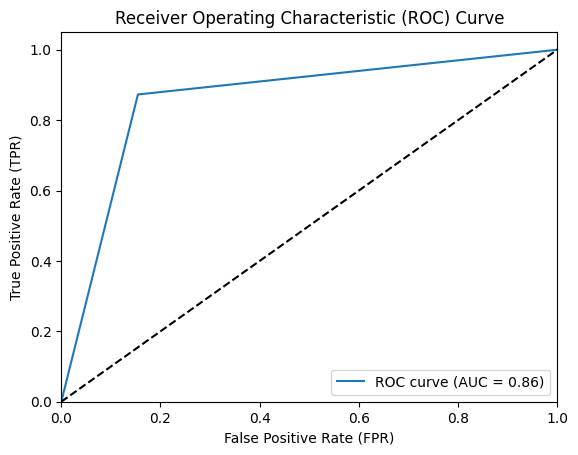

In [ ]:
GBC_prediction = GBC.predict(x_test)
plot_roc_curve(y_test, GBC_prediction)

In [ ]:
#GBC AUC=0.86

## **Gradient Booster Classifier Overall Scores**

In [ ]:
GBC_f1_score = 0.86
GBC_accuracy = 0.86
GBC_precision = 0.86
GBC_recall = 0.86

# **eXtreme Gradient Boosting (XGBC)**

In [ ]:
#faster than GBC and performs better
#Better model for much larger datasets

In [ ]:
xgb = XGBClassifier()

    # Define the parameter grid
param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_child_weight': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(xgb, param_grid, x_train, y_train, x_test, y_test)

    # Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 200, 'subsample': 0.8}
Test Score (Accuracy): 0.8710691823899371


In [ ]:
xgb = XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.2, max_depth = 5,
                    min_child_weight = 4, n_estimators = 200, subsample = 0.8)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4970
           1       0.85      0.89      0.87      4570

    accuracy                           0.87      9540
   macro avg       0.87      0.87      0.87      9540
weighted avg       0.87      0.87      0.87      9540



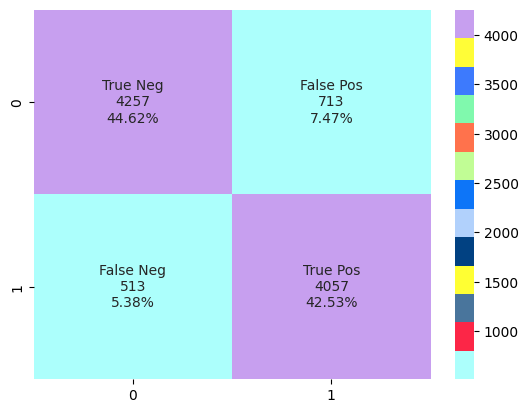

In [ ]:
model_evaluation(xgb, x_test, y_test)

In [ ]:
#  precision    recall  f1-score   support
#
#           0       0.89      0.86      0.87      4970
#           1       0.85      0.89      0.87      4570
#
#    accuracy                           0.87      9540
#   macro avg       0.87      0.87      0.87      9540
#weighted avg       0.87      0.87      0.87      9540

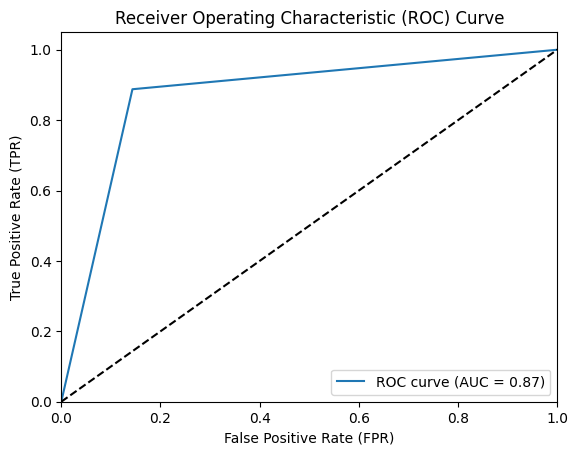

In [ ]:
xgb_prediction = xgb.predict(x_test)
plot_roc_curve(y_test, xgb_prediction)

In [ ]:
#XGBC AUC=0.87

## **eXtreme Gradient Boosting Overall Scores**

In [ ]:
XGBC_f1_score = 0.87
XGBC_accuracy = 0.87
XGBC_precision = 0.87
XGBC_recall = 0.87

In [ ]:
#comparing models
f1_score=[LogReg_f1_score,knn_f1_score,RF_f1_score,GBC_f1_score,XGBC_f1_score]
accuracy=[LogReg_accuracy,knn_accuracy,RF_accuracy,GBC_accuracy,XGBC_accuracy]
precision=[LogReg_precision,knn_precision,RF_precision,GBC_precision,XGBC_precision]
recall=[LogReg_recall,knn_recall,RF_recall,GBC_recall,XGBC_recall]

col={'f1_score':f1_score,'accuracy':accuracy,'precision':precision,'recall':recall}
models=['Logistic Regression','KNN','Random Forest','GB','XGB']
df=pd.DataFrame(data=col,index=models)
df

f1_score  accuracy  precision  recall
Logistic Regression      0.79      0.79       0.79    0.79
KNN                      0.86      0.86       0.86    0.86
Random Forest            0.87      0.87       0.87    0.87
GB                       0.86      0.86       0.86    0.86
XGB                      0.87      0.87       0.87    0.87

from matplotlib import pyplot as plt
df['f1_score'].plot(kind='hist', bins=20, title='f1_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['precision'].plot(kind='hist', bins=20, title='precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['recall'].plot(kind='hist', bins=20, title='recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='f1_score', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='accuracy', y='precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='precision', y='recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['f1_score'].plot(kind='line', figsize=(8, 4), title='f1_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['precision'].plot(kind='line', figsize=(8, 4), title='precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['recall'].plot(kind='line', figsize=(8, 4), title='recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

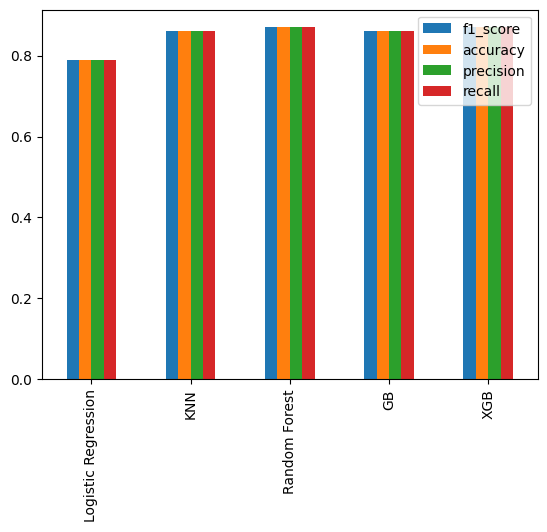

In [304]:
df.plot(kind='bar')